In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_pays=pd.read_csv('EdStatsCountry.csv', sep=',')
data_pays_series=pd.read_csv('EdStatsCountry-Series.csv', sep=',')
data=pd.read_csv('EdStatsData.csv', sep=',')
data_footnote=pd.read_csv('EdStatsFootNote.csv', sep=',')
data_series=pd.read_csv('EdStatsSeries.csv', sep=',')

# Exploration des donnees

## Table 1 **EdStatsCountry**

In [3]:
data_pays.shape

(241, 32)

In [4]:
data_pays.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [5]:
len(data_pays['Country Code'].unique())

241

In [6]:
data_pays.isna().sum()

Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                        194
PPP survey year                

Informations sur des enquetes effectuees dans 241 pays. Informations pertinentes : **Region** et **Income Group**

In [7]:
data_pays[data_pays['Region'].isna()]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
5,ARB,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,EAP,East Asia & Pacific (developing only),East Asia & Pacific,East Asia & Pacific (developing only),4E,NaN,East Asia and Pacific regional aggregate (does...,NaN,NaN,4E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,EAS,East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),Z4,NaN,East Asia and Pacific regional aggregate (incl...,NaN,NaN,Z4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,ECA,Europe & Central Asia (developing only),Europe & Central Asia,Europe & Central Asia (developing only),7E,NaN,Europe and Central Asia regional aggregate (do...,NaN,NaN,7E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,ECS,Europe & Central Asia (all income levels),Europe & Central Asia (all income levels),Europe & Central Asia (all income levels),Z7,NaN,Europe and Central Asia regional aggregate (in...,NaN,NaN,Z7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,EMU,Euro area,Euro area,Euro area,XC,NaN,Euro area aggregate.,NaN,NaN,XC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,EUU,European Union,European Union,European Union,EU,NaN,European Union aggregate.,NaN,NaN,EU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,GIB,Gibraltar,Gibraltar,Gibraltar,GI,Gibraltar pound,NaN,NaN,NaN,GI,...,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,HIC,High income,High income,High income,XD,NaN,High income group aggregate. High-income econo...,NaN,NaN,XD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,HPC,Heavily indebted poor countries (HIPC),Heavily indebted poor countries (HIPC),Heavily indebted poor countries (HIPC),XE,NaN,Heavily indebted poor countries aggregate.,NaN,NaN,XE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ces entities sont des regions geographique ou economiques, eventuellement a enlever du jeu de donnees

## Table 2: EdStatsCountry-Series

In [8]:
data_pays_series.shape

(613, 4)

In [9]:
data_pays_series.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [10]:
len(data_pays_series['CountryCode'].unique())

211

In [11]:
data_pays_series.isna().sum()

CountryCode      0
SeriesCode       0
DESCRIPTION      0
Unnamed: 3     613
dtype: int64

In [12]:
data_pays_series['SeriesCode'].value_counts(ascending=False)

SP.POP.TOTL          211
SP.POP.GROW          211
NY.GDP.PCAP.PP.CD     19
NY.GDP.PCAP.PP.KD     19
NY.GNP.PCAP.PP.CD     19
NY.GDP.MKTP.PP.KD     14
NY.GNP.MKTP.PP.CD     14
NY.GDP.MKTP.PP.CD     14
SP.POP.0014.TO.ZS     13
SP.POP.TOTL.FE.ZS     13
SP.POP.TOTL.MA.ZS     13
SP.POP.1564.TO.ZS     13
NY.GNP.PCAP.CD         6
NY.GDP.PCAP.CD         5
NY.GDP.PCAP.KD         5
SP.POP.1564.MA.IN      4
SP.POP.0014.TO         4
SP.POP.1564.TO         4
SP.POP.1564.FE.IN      4
SP.POP.0014.MA.IN      4
SP.POP.0014.FE.IN      4
Name: SeriesCode, dtype: int64

Description de differents indicateurs concernant la population pour 211 pays. Indicateurs pertinants a etudier **SP.POP.TOTL** et **SP.POP.GROW** present pour tous les pays.    

## Table 3: EdStatsData

In [13]:
data.shape

(886930, 70)

In [14]:
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
len(data['Country Code'].unique())

242

In [16]:
len(data['Indicator Code'].unique())

3665

In [17]:
data.isna().sum().head(20)

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
1971              851393
1972              851311
1973              851385
1974              851200
1975              799624
1976              849447
1977              849356
1978              849354
1979              850121
1980              797808
1981              848153
1982              849419
1983              848470
1984              848324
1985              796634
dtype: int64

C'est la table de donnees principale, elle contient des informations de **3665 indicateurs** sur **242 pays** pour les **annees entre 1970 a 2100**. Elle presente beaucoup de valeurs manquantes sur les annees. C'est la table principale a netoyer

## Table 4 : EdStatsFootNote

In [18]:
data_footnote.shape

(643638, 5)

In [19]:
data_footnote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [20]:
len(data_footnote['CountryCode'].unique())

239

In [21]:
len(data_footnote['SeriesCode'].unique())

1558

In [22]:
data_footnote.isna().sum()

CountryCode         0
SeriesCode          0
Year                0
DESCRIPTION         0
Unnamed: 4     643638
dtype: int64

Repartition par annees d'etude de **1558** indicateurs concernant **239** pays. Probleme: Les annees ne sont pas numerique, il faudrait les convertir en numerique envant de pouvoir en extraire des informations 

## Table 5: EdStatsSeries

In [23]:
data_series.shape

(3665, 21)

In [24]:
data_series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
len(data_series['Series Code'].unique())

3665

In [26]:
len(data_series['Topic'].unique())

37

In [27]:
data_series.isna().sum()

Series Code                               0
Topic                                     0
Indicator Name                            0
Short definition                       1509
Long definition                           0
Unit of measure                        3665
Periodicity                            3566
Base Period                            3351
Other notes                            3113
Aggregation method                     3618
Limitations and exceptions             3651
Notes from original source             3665
General comments                       3651
Source                                    0
Statistical concept and methodology    3642
Development relevance                  3662
Related source links                   3450
Other web links                        3665
Related indicators                     3665
License Type                           3665
Unnamed: 20                            3665
dtype: int64

Informations sur les **3665** indicateurs repartis sur **37 themes**. Informations pertinentes dans cette table: groupement des indicateurs par theme et la definition de chaque indicateur. Ces informations seront importantes dans la phase de selections des indicateurs pertinents pour notre etude.

# Analyse preliminanire des donnees


# Etape 1: Netoyer par 'Topic' dans la table data_series

In [28]:
data_series['Topic'].value_counts()

Learning Outcomes                                                                               1046
Attainment                                                                                       733
Education Equality                                                                               426
Secondary                                                                                        256
Primary                                                                                          248
Population                                                                                       213
Tertiary                                                                                         158
Teachers                                                                                         137
Expenditures                                                                                      93
Engaging the Private Sector (SABER)                                                        

## Premiere etude permet d'eliminer les themes non pertinents a notre etude
Les informations qu'on aimerait garder concerne la population, des informations sur le taux d'inscription en secodaire et post secondaire, la communication et infrastructure internet, les depenses et les indicateurs sur l'economie. Pour mieux comprendre les differentes donnees je fais un groupement par **Topic** et regarde les types d'indicateurs qui sont dans les sous-groupes

Cette etude subjective me permet de cibler des indicateurs qui ne sont pas pertinents pour notre etude. Je les groupe dans un string array **not_needed_topics** et les eliminent de la table **data_series**

In [29]:
not_needed_topics=['Learning Outcomes','Education Equality','Student Assessment (SABER)','Engaging the Private Sector (SABER)' ,'School Autonomy and Accountability (SABER)','Primary','Early Childhood Education','Pre-Primary','Teachers','Early Child Development (SABER)','Social Protection & Labor: Labor force structure','School Health and School Feeding (SABER)','Teachers (SABER)','Health: Risk factors','School Finance (SABER)','Health: Mortality','Laber']

In [30]:
data_series=data_series[~data_series['Topic'].isin(not_needed_topics)]
data_series['Topic'].value_counts()

Attainment                                                                                      733
Secondary                                                                                       256
Population                                                                                      213
Tertiary                                                                                        158
Expenditures                                                                                     93
Literacy                                                                                         32
Education Management Information Systems (SABER)                                                 23
Post-Secondary/Non-Tertiary                                                                      19
Tertiary Education (SABER)                                                                       17
Health: Population: Structure                                                                    13


In [31]:
len(data_series['Topic'].unique())

20

## On applique ces changements sur la table data
J'extrait de **data_series** les indicateurs restants et je les projette dans la table **data**

In [32]:
indic_to_keep=data_series['Series Code']
data=data[data['Indicator Code'].isin(indic_to_keep)]

In [33]:
data.shape

(375826, 70)

# Etape 2 : Decider sur les annees a garder
On retourne sur la table **data_footnote** et on fait une petite etude sur les annees.
## Convertir Year en numerique dans data_footnote
Pour simplifier le traitement de donnees, on convertit la colonne "Year" de types string en un format numerique et cela en effacant les 2 premiers caracteres YR et en convertissant le reste en numerique

In [34]:
data_footnote['Year']=pd.to_numeric(data_footnote['Year'].str[2:])


In [35]:
data_footnote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,2006,Country estimation.,NaN


In [36]:
data_footnote['Year'].describe()

count    643638.000000
mean       1996.899961
std          12.211624
min        1970.000000
25%        1988.000000
50%        2000.000000
75%        2006.000000
max        2050.000000
Name: Year, dtype: float64

On remarque que les etudes sont entre les annees 1970 et 2050 

In [37]:
indic_par_annee=data_footnote['Year'].value_counts()

<BarContainer object of 55 artists>

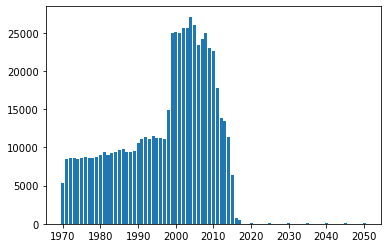

In [38]:
plt.bar(indic_par_annee.index, indic_par_annee.values)

### Conclusion
On observe qu'on n'a pas beaucoup d'information apres l'annee 2015. On decide donc de concentrer notre etude entre les annees **1970 et 2015**.
### Nous allons eliminer les colonnes des annees non pertinentes dans la table data
On construit un array d'annees entre 2020 et 2100 avec 5 ans d'intervalle et on le transform en string

In [39]:
years_to_delete=np.arange(2020, 2105,5)
years_to_delete=np.array(years_to_delete).astype('str')
years_to_delete

array(['2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055',
       '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095',
       '2100'], dtype='<U11')

On efface ensuite ces colonnes de la table **data** 

In [40]:
data=data.drop(years_to_delete, axis=1)

In [41]:
data.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On enlevera egalement la derniere colonne **Unnamed: 69** 

In [42]:
#data=data.drop(, axis=1)
data=data.drop(['1970','1971','Unnamed: 69'], axis=1)

In [43]:
data.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Etape 3: On regarde les valeurs manquantes

In [44]:
import missingno as msno

<AxesSubplot:>

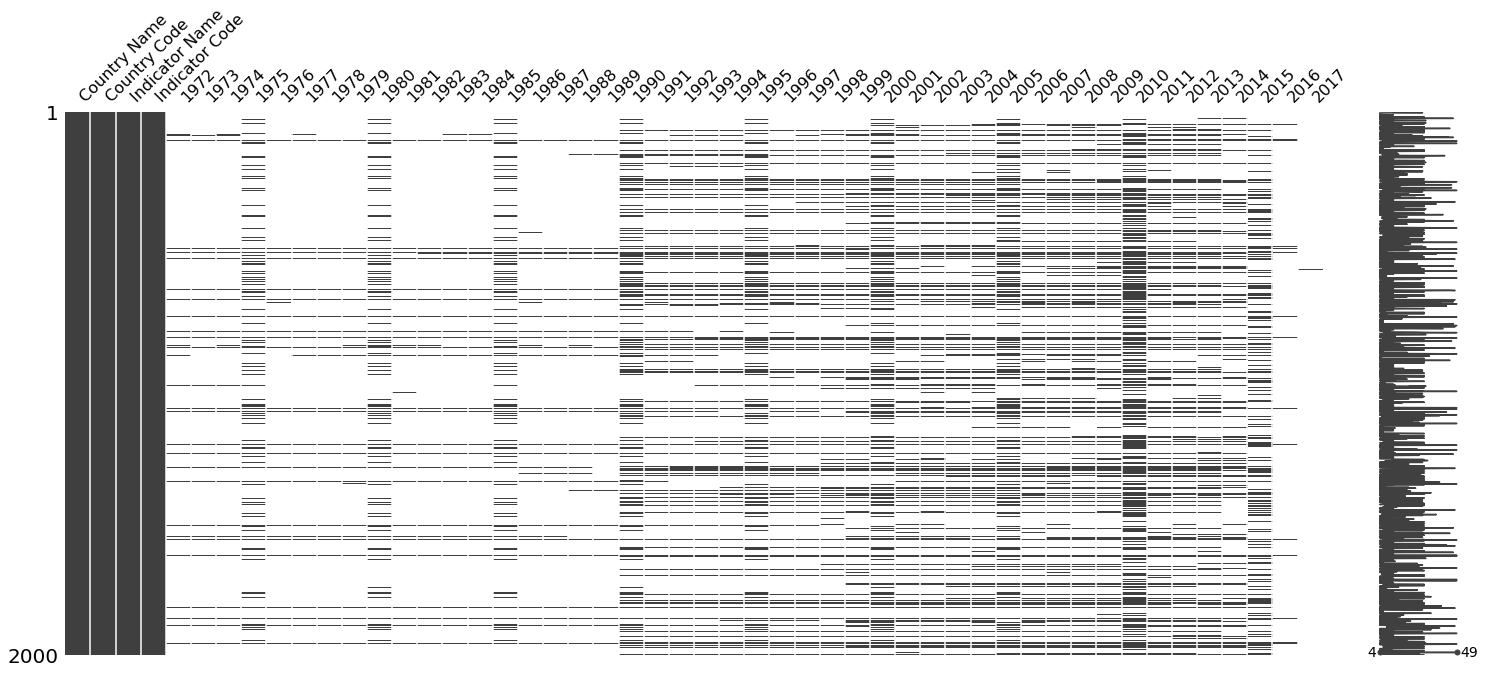

In [45]:
%matplotlib inline
msno.matrix(data.sample(2000))

La *nullity matrix* nous permet de voir que la concentration des valeurs manquantes est entre les annees 1970 et 1989. Le periode entre 1990 et 2016 apparait plus complete.

<AxesSubplot:>

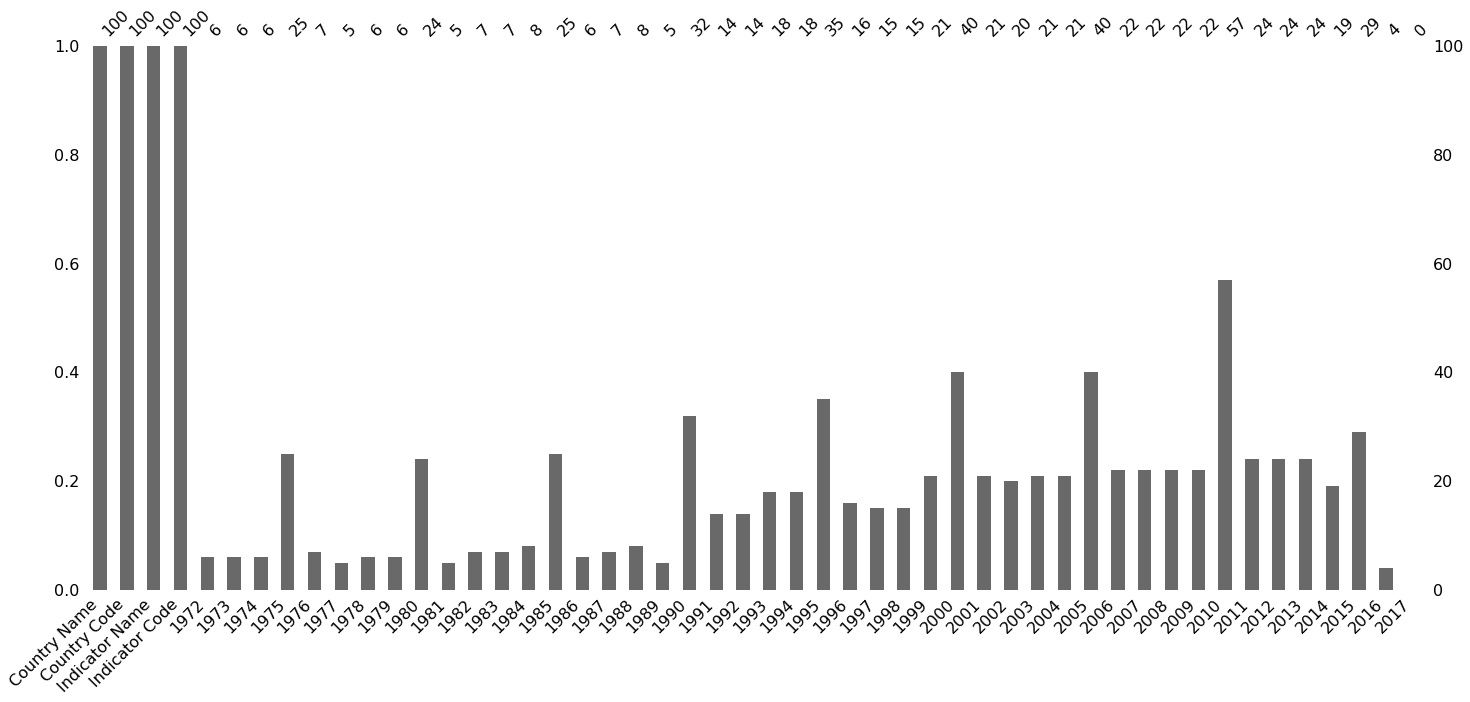

In [46]:
msno.bar(data.sample(100))

## On garde la periode entre 1991 et 2016

In [47]:
years_to_keep=np.arange(1991, 2017)
years_to_keep=np.array(years_to_keep).astype('str')
country_info=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
columns_tokeep=np.concatenate([country_info, years_to_keep])
data=data[columns_tokeep]

In [48]:
data.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,1996,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## On fait un netoayge des valeurs NAN dans les lignes completement vides 

In [49]:
data=data.dropna(how="all", subset=years_to_keep)

<AxesSubplot:>

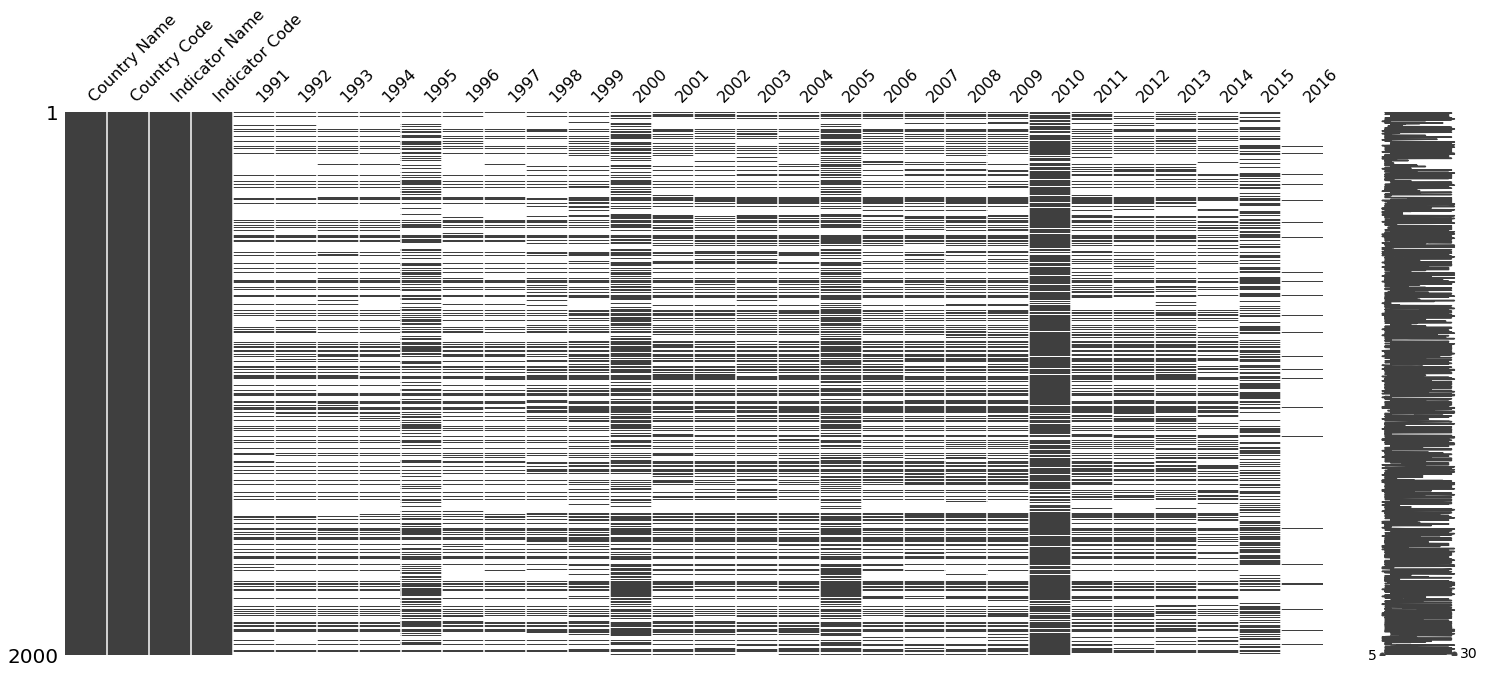

In [50]:
%matplotlib inline
msno.matrix(data.sample(2000))

<AxesSubplot:>

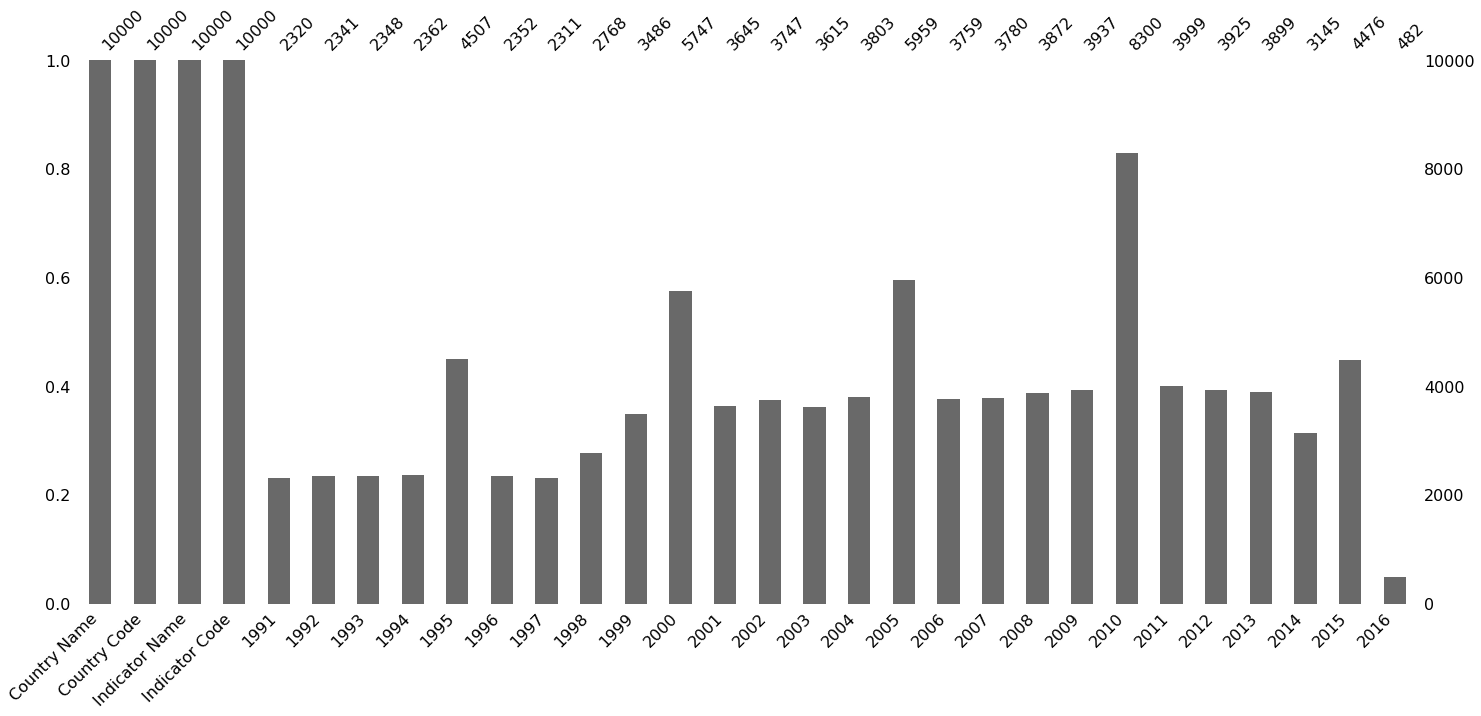

In [51]:
msno.bar(data.sample(10000))

In [52]:
data.shape

(240760, 30)

## Conclusion
Ce premier netoyage a renforce le fait que les donnees sont regroupees de 2 facons. Ils y a des indicateurs sur 5 ans et des indicateurs annuels



On peut voir a partir de ce diagramme que ce jeu de donnees contient toujours beaucoup de valeurs manquantes. On utilise la fonction **dropna** sur les lignes qui representent au moins 5 valeurs non nulles dans les colonnes des annees (pour les annees entre 1991 et 2016 

In [53]:
data=data.dropna(how="all",thresh=5, subset=years_to_keep)
data.shape

(106403, 30)


### Reperer la periodicite des indicateurs

On regarde encore une fois les informations dans data_series. Notememnt les colonnes **Periodicity** et **Base Period**


In [54]:
data_series['Periodicity'].value_counts()

Annual    83
Name: Periodicity, dtype: int64

Dans la colonne **Periodicity** on ne retrouve pas trop d'informations. Les indicateurs qui sont marques comme annuel sont 65

In [55]:
data_series['Base Period'].value_counts()

Projections (2010 to 2100)    308
2010                            2
2011                            2
14                              2
Name: Base Period, dtype: int64

Dans la colonne **Base Period** on retrouve des indicateurs de projections. Ces indicateurs n'ont pas de valeurs pour les annees <2010. On decide donc de les isoler et de les enlever pour le moment de la table **data**

In [56]:
par_period=data_series.groupby('Base Period')

In [57]:
indic_projection=par_period.get_group('Projections (2010 to 2100)')['Series Code'] #donne une series avec les indicateurs de projection. 
len(indic_projection)

308

In [58]:
Projections=data[data['Indicator Code'].isin(indic_projection)]


### Conclusion
Les valeurs de projection sont pour les indicateurs sur l'education. On decidera plutard si leur etude est pertinente. 

<AxesSubplot:>

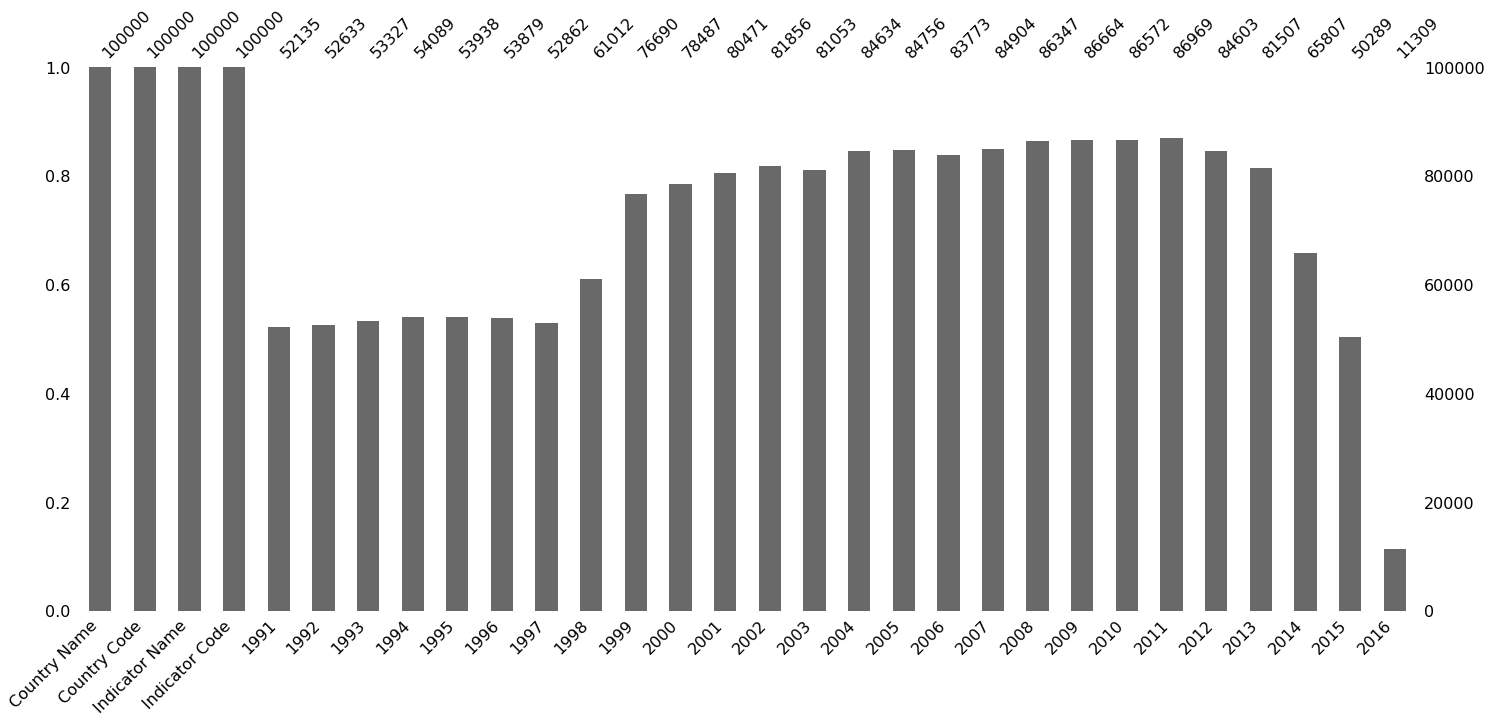

In [59]:
msno.bar(data.sample(100000))

On applique les netoyages effectues sur la table de donnees **data_series**

In [60]:
indicateurs25ans=data['Indicator Code'] #On regarde les indicateurs qu'on a garder dans la table de donnee data25ans

In [61]:
data_series25ans=data_series[data_series['Series Code'].isin(indicateurs25ans)]

In [62]:
data_series25ans['Topic'].value_counts()

Secondary                                                                                       243
Population                                                                                      213
Tertiary                                                                                        148
Expenditures                                                                                     86
Attainment                                                                                       63
Literacy                                                                                         20
Post-Secondary/Non-Tertiary                                                                      19
Health: Population: Structure                                                                    13
Economic Policy & Debt: Purchasing power parity                                                   6
Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators            3


# Etape 5: On regarde la table de donnees data_pays_series

In [63]:
data_pays_series.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [64]:
data_pays_series['SeriesCode'].value_counts()

SP.POP.TOTL          211
SP.POP.GROW          211
NY.GDP.PCAP.PP.CD     19
NY.GDP.PCAP.PP.KD     19
NY.GNP.PCAP.PP.CD     19
NY.GDP.MKTP.PP.KD     14
NY.GNP.MKTP.PP.CD     14
NY.GDP.MKTP.PP.CD     14
SP.POP.0014.TO.ZS     13
SP.POP.TOTL.FE.ZS     13
SP.POP.TOTL.MA.ZS     13
SP.POP.1564.TO.ZS     13
NY.GNP.PCAP.CD         6
NY.GDP.PCAP.CD         5
NY.GDP.PCAP.KD         5
SP.POP.1564.MA.IN      4
SP.POP.0014.TO         4
SP.POP.1564.TO         4
SP.POP.1564.FE.IN      4
SP.POP.0014.MA.IN      4
SP.POP.0014.FE.IN      4
Name: SeriesCode, dtype: int64

### Conclusion: De la table data_pays_series on retrouve 2 indicateurs qui sont utilises dans tous les pays. On va eliminer les autres de la table data

In [65]:
indic_a_garder=['SP.POP.TOTL','SP.POP.GROW']
codeSeries=data_pays_series['SeriesCode']
indic_a_supp1=np.setdiff1d(codeSeries,indic_a_garder)#on enleve de la liste des indicateurs ceux qu'on veut garder
indic_a_supp1

array(['NY.GDP.MKTP.PP.CD', 'NY.GDP.MKTP.PP.KD', 'NY.GDP.PCAP.CD',
       'NY.GDP.PCAP.KD', 'NY.GDP.PCAP.PP.CD', 'NY.GDP.PCAP.PP.KD',
       'NY.GNP.MKTP.PP.CD', 'NY.GNP.PCAP.CD', 'NY.GNP.PCAP.PP.CD',
       'SP.POP.0014.FE.IN', 'SP.POP.0014.MA.IN', 'SP.POP.0014.TO',
       'SP.POP.0014.TO.ZS', 'SP.POP.1564.FE.IN', 'SP.POP.1564.MA.IN',
       'SP.POP.1564.TO', 'SP.POP.1564.TO.ZS', 'SP.POP.TOTL.FE.ZS',
       'SP.POP.TOTL.MA.ZS'], dtype=object)

In [66]:
data=data[~data['Indicator Code'].isin(indic_a_supp1)]

Et de la table **data_series**

In [67]:
data_series25ans=data_series25ans[~data_series25ans['Series Code'].isin(indic_a_supp1)]

In [68]:
data_series25ans.shape

(807, 21)

## Indicateurs sur la population
On etudie de plus pres la representation de ces indicateurs dans la table data. On a un indicateur sur la population totale et un indicateur sur la progression de la population par an.

In [69]:
indic_a_garder=['SP.POP.TOTL','SP.POP.GROW']
dataPop=data[data['Indicator Code'].isin(indic_a_garder)]
dataPop.shape

(480, 30)

In [70]:
len(dataPop['Country Code'].unique())

240

Ce sont des indicateurs bien representes dans la population. On les garde

# Etape 6: Jointure
Nous allons maintenant faire une jointure entre la table **data_series25ans** et **data** pour ajouter l'information **Topic** aux indicateurs. Nous ferons ensuite une etude par type d'indicateurs pour choisir ceux qui sont les plus pertinents 

In [71]:
data_series25ans.head(1)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
610,IT.CMP.PCMP.P2,Infrastructure: Communications,Personal computers (per 100 people),NaN,Personal computers are self-contained computer...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,Restricted use: Please cite the International ...,"International Telecommunication Union, World T...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
data_Topic=data_series25ans[['Series Code','Topic']]

In [73]:
data_Topic=data_Topic.rename(columns={'Series Code':'Indicator Code'})

In [74]:
data.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,1996,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
19,Arab World,ARB,"Adult illiterate population, 15+ years, male (...",UIS.LP.AG15T99.M,2.214988e+07,2.214988e+07,2.214988e+07,2.214988e+07,2.194009e+07,2.194009e+07,...,1.955485e+07,1.955485e+07,1.955485e+07,1.955485e+07,1.955485e+07,1.955485e+07,1.955485e+07,1.955485e+07,NaN,NaN
20,Arab World,ARB,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,5.459347e+01,5.459347e+01,5.459347e+01,5.459347e+01,6.600607e+01,6.600607e+01,...,7.736459e+01,7.736459e+01,7.736459e+01,7.736459e+01,7.736459e+01,7.736459e+01,7.736459e+01,7.736459e+01,NaN,NaN


In [75]:
new_data=pd.merge(data_Topic,data)

In [76]:
new_data.head(2)

,Indicator Code,Topic,Country Name,Country Code,Indicator Name,1991,1992,1993,1994,1995,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,IT.CMP.PCMP.P2,Infrastructure: Communications,Arab World,ARB,Personal computers (per 100 people),NaN,NaN,NaN,0.63790,0.818198,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IT.CMP.PCMP.P2,Infrastructure: Communications,East Asia & Pacific,EAS,Personal computers (per 100 people),0.957449,1.059987,1.234398,1.49953,1.874432,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### De la table data_pays on prend les colonnes Region et Income Group et on les ajoute a la jointure

In [77]:
data_pays.head(1)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN


In [78]:
data_pays['Income Group'].value_counts()

Upper middle income     55
Lower middle income     50
High income: nonOECD    44
Low income              34
High income: OECD       31
Name: Income Group, dtype: int64

In [79]:
pays_Region=data_pays[['Country Code','Region','Income Group']]

In [80]:
dataFinal=pd.merge(pays_Region,new_data,how="right")

In [81]:
dataFinal.head()

,Country Code,Region,Income Group,Indicator Code,Topic,Country Name,Indicator Name,1991,1992,1993,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,ARB,NaN,NaN,IT.CMP.PCMP.P2,Infrastructure: Communications,Arab World,Personal computers (per 100 people),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EAS,NaN,NaN,IT.CMP.PCMP.P2,Infrastructure: Communications,East Asia & Pacific,Personal computers (per 100 people),0.957449,1.059987,1.234398,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EAP,NaN,NaN,IT.CMP.PCMP.P2,Infrastructure: Communications,East Asia & Pacific (excluding high income),Personal computers (per 100 people),0.122988,0.167314,0.211265,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EMU,NaN,NaN,IT.CMP.PCMP.P2,Infrastructure: Communications,Euro area,Personal computers (per 100 people),6.836030,8.419337,9.457520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ECS,NaN,NaN,IT.CMP.PCMP.P2,Infrastructure: Communications,Europe & Central Asia,Personal computers (per 100 people),4.531986,5.474508,6.264242,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
dataFinal.shape

(102247, 33)

In [83]:
dataFinal.isna().sum()

Country Code          0
Region             5020
Income Group       5020
Indicator Code        0
Topic                 0
Country Name          0
Indicator Name        0
1991              50685
1992              50181
1993              49487
1994              48668
1995              48953
1996              49013
1997              50109
1998              41407
1999              24752
2000              22906
2001              20760
2002              19290
2003              20175
2004              16369
2005              16226
2006              17239
2007              16035
2008              14509
2009              14210
2010              14293
2011              13876
2012              16345
2013              19683
2014              36255
2015              52759
2016              94169
dtype: int64

In [84]:
dataFinal[dataFinal['Region'].isna()]['Country Name'].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Gibraltar',
       'British Virgin Islands', 'Nauru'], dtype=object)

In [85]:
len(dataFinal[dataFinal['Region'].isna()]['Country Name'].unique())

28

Ce sont les aggregations de regions geograpphiques et economiques, on les enleve du jeu de donnees

In [86]:
dataFinal=dataFinal[~dataFinal['Region'].isna()]

In [87]:
len(dataFinal['Country Code'].unique())

214

In [88]:
len(dataFinal['Indicator Code'].unique())

807

In [89]:
len(dataFinal['Topic'].unique())

15

In [90]:
dataFinal.shape

(97227, 33)

In [91]:
dataFinal['Topic'].value_counts()

Population                                                                                      40645
Secondary                                                                                       29824
Tertiary                                                                                        12463
Expenditures                                                                                     7245
Attainment                                                                                       2337
Post-Secondary/Non-Tertiary                                                                      1345
Literacy                                                                                          799
Health: Population: Structure                                                                     602
Social Protection & Labor: Unemployment                                                           558
Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indica

In [92]:
dataFinal.isna().sum()

Country Code          0
Region                0
Income Group          0
Indicator Code        0
Topic                 0
Country Name          0
Indicator Name        0
1991              48075
1992              47721
1993              47141
1994              46552
1995              46870
1996              46953
1997              48733
1998              41011
1999              24509
2000              22723
2001              20625
2002              19149
2003              19991
2004              16196
2005              16085
2006              17088
2007              15928
2008              14400
2009              14097
2010              14135
2011              13707
2012              16242
2013              19501
2014              35797
2015              48418
2016              89439
dtype: int64

<AxesSubplot:>

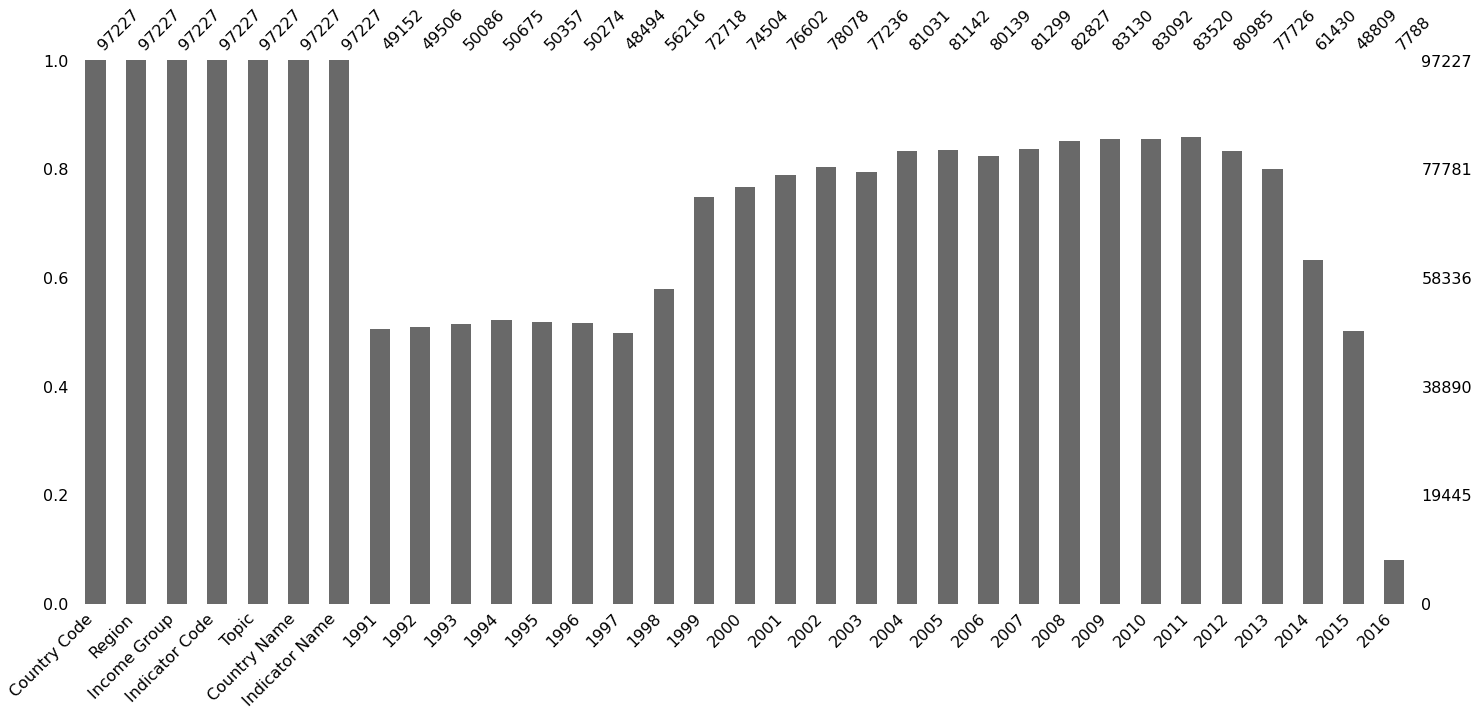

In [93]:
msno.bar(dataFinal.sample(97227))

# Etape 7: Recherche des indicateurs par theme

Je regroupe les donnees par **Topics** et je regarde les indicateurs dans chaque theme pour reperer ceux qui sont pertinent pour garder.

In [94]:
Topic_group=dataFinal.groupby('Topic')

In [95]:
Attainment_data=Topic_group.get_group('Attainment')

In [96]:
Attainment_data['Indicator Name'].value_counts(ascending=False).head(2)

UIS: Percentage of population age 25+ with at least completed upper secondary education (ISCED 3 or higher). Male      64
UIS: Percentage of population age 25+ with at least completed upper secondary education (ISCED 3 or higher). Female    64
Name: Indicator Name, dtype: int64

## Conclusion
Dans les indicateur sur le manque d'education, les indicateurs sont partages par tranches d'ages. Nous choisirons de prendre le pourcentage total de la population agee de plus de 15 ans sans education, donne par l'indicateur **BAR.NOED.15UP.ZS** On pourrait aussi prendre l'indicateur sur ce pourcentage chez les femmes donne par **BAR.NOED.15UP.FE.ZS**

'BAR.NOED.15UP.ZS'
#Pourcentage de la population >15ans sans education

'BAR.SEC.CMPT.15UP.ZS'
#Pourcentage de la population >15ans ayant complete l'education secondaire

'BAR.SEC.ICMP.15UP.ZS'
#Pourcentage de la population >15ans ayant complete ou non l'education secondaire

'BAR.TER.CMPT.15UP.ZS'
#Pourcentage de la population >15ans ayant complete l'education tertiaire

'BAR.TER.ICMP.15UP.ZS'
#Pourcentage de la population >15ans ayant ou non complete l'education tertiaire

##### Indicateurs a grader
'BAR.SCHL.15UP' Nombre moyen d'annees d'etudes

'BAR.SEC.SCHL.15UP' Nombre moyen d'annees d'etudes secondaire

'BAR.TER.SCHL.15UP' Nombre moyen d'annees d'etudes tertiares

'BAR.POP.15UP' Population total des plus de 15 ans


## Attainment
Ce theme traite des reussite scolaire. J'ai repere pour le moment les indicateurs de pourcentage et de moyenne d'annee d'etude pour les cycle secondaire et tertiare ainsi que le pourcentage de la population sans education et le nombre total de la population le tout pour la popualtion 15ans + en attente de trouver des informations plus pertinentes sur le taux d'inscritption general

## Le theme Population

In [97]:
Population_data=Topic_group.get_group("Population")
Population_data[Population_data['Indicator Name']=='Population, ages 15-24, total']['Indicator Code'].head(1)

34487    SP.POP.1524.TO.UN
Name: Indicator Code, dtype: object

Pas d'indicateurs retenus de ce groupe,  on a deja repere l'indicateur sur la population totale par pays


# Theme Secondary

In [98]:
Secondary_data=Topic_group.get_group("Secondary")
Secondary_data['Indicator Name'].value_counts().sort_values(ascending=False).head(2)

Official entrance age to lower secondary education (years)    206
Theoretical duration of upper secondary education (years)     206
Name: Indicator Name, dtype: int64

In [99]:
Secondary_data[Secondary_data['Indicator Name']=='Gross enrolment ratio, secondary, both sexes (%)']['Indicator Code'].head(1) 

6558    SE.SEC.ENRR
Name: Indicator Code, dtype: object

##### Indicateur a garder
'SE.SEC.ENRR' le taux d'inscription au etudes secondaires

# Theme Tertiary

In [100]:
Tertiary_data=Topic_group.get_group("Tertiary")
Tertiary_data['Indicator Name'].value_counts().sort_values(ascending=False).head(2)

Gross outbound enrolment ratio, all regions, both sexes (%)             188
Enrolment in tertiary education, all programmes, both sexes (number)    170
Name: Indicator Name, dtype: int64

In [101]:
Tertiary_data[Tertiary_data['Indicator Name']=='Gross enrolment ratio, tertiary, both sexes (%)']['Indicator Code'].head(1)

10177    SE.TER.ENRR
Name: Indicator Code, dtype: object

In [102]:
Tertiary_data[Tertiary_data['Indicator Name']=='Gross enrolment ratio, primary to tertiary, both sexes (%)']['Indicator Code'].head(1)

13229    SE.TOT.ENRR
Name: Indicator Code, dtype: object

In [103]:
Tertiary_data[Tertiary_data['Indicator Name']=='Gross outbound enrolment ratio, all regions, both sexes (%)']['Indicator Code'].head(1)

73745    UIS.GOER.56
Name: Indicator Code, dtype: object

#### Indicateurs a garder
'SE.TER.ENRR' Gross enrolment ratio, tertiary, both sexes (%)

'SE.TOT.ENRR' Gross enrolment ratio, primary to tertiary, both sexes (%)
#Cet indicateur est plus general et est plus pertinent pour l'etude

'UIS.GOER.56' Gross outbound enrolment ratio, all regions, both sexes (%)

# Theme Literacy                            

In [104]:
Literacy_data=Topic_group.get_group("Literacy")
Literacy_data['Indicator Code'].value_counts().head(2)

UIS.LP.AG15T99.M     41
SE.ADT.LITR.FE.ZS    41
Name: Indicator Code, dtype: int64

Pas d'indicateurs a retenir 

# Theme Expenditures                        

In [105]:
Expenditures_data=Topic_group.get_group("Expenditures")
Expenditures_data['Indicator Name'].value_counts(ascending=False).head(2)                       

Government expenditure on education as % of GDP (%)                  166
Expenditure on education as % of total government expenditure (%)    156
Name: Indicator Name, dtype: int64

##### Indicateurs a garder


In [106]:
Expenditures_data[Expenditures_data['Indicator Name']=='Expenditure on tertiary as % of government expenditure on education (%)']['Indicator Code'].head(1)

14094    SE.XPD.TERT.ZS
Name: Indicator Code, dtype: object

In [107]:
Expenditures_data[Expenditures_data['Indicator Name']=='Expenditure on secondary as % of government expenditure on education (%)']['Indicator Code'].head(1)

13852    SE.XPD.SECO.ZS
Name: Indicator Code, dtype: object

In [108]:
Expenditures_data[Expenditures_data['Indicator Name']=='Government expenditure on education as % of GDP (%)']['Indicator Code'].head(1)

14397    SE.XPD.TOTL.GD.ZS
Name: Indicator Code, dtype: object

In [109]:
Expenditures_data[Expenditures_data['Indicator Name']=='Expenditure on education as % of total government expenditure (%)']['Indicator Code'].head(1)

14241    SE.XPD.TOTL.GB.ZS
Name: Indicator Code, dtype: object

# Theme Infrastructure: Communications

In [110]:
Infrastructure_data=Topic_group.get_group("Infrastructure: Communications")
Infrastructure_data['Indicator Name'].value_counts()

Internet users (per 100 people)        203
Personal computers (per 100 people)    182
Name: Indicator Name, dtype: int64

#### Indicateurs a garder

In [111]:
Infrastructure_data[Infrastructure_data['Indicator Name']=='Internet users (per 100 people)']['Indicator Code'].head(1)

232    IT.NET.USER.P2
Name: Indicator Code, dtype: object

In [112]:
Infrastructure_data[Infrastructure_data['Indicator Name']=='Personal computers (per 100 people)']['Indicator Code'].head(1)

25    IT.CMP.PCMP.P2
Name: Indicator Code, dtype: object

# Theme Health: Population: Structure       
        

In [113]:
Structure_data=Topic_group.get_group("Health: Population: Structure")
Structure_data['Indicator Name'].value_counts()

Population, total     214
Population, female    194
Population, male      194
Name: Indicator Name, dtype: int64

#### Indicateur a garder

In [114]:
Structure_data[Structure_data['Indicator Name']=='Population, total']['Indicator Code'].head(1)

49841    SP.POP.TOTL
Name: Indicator Code, dtype: object

# Theme Background

In [115]:
Background_data=Topic_group.get_group("Background")
Background_data['Indicator Name'].value_counts()

Duration of compulsory education (years)    188
Name: Indicator Name, dtype: int64

# Theme : GDP 

In [116]:
GDPAgg=Topic_group.get_group('Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators')
GDPAgg['Indicator Name'].value_counts()

GDP at market prices (current US$)    207
GNI (current US$)                     200
Name: Indicator Name, dtype: int64

In [117]:
GDPAgg2010=Topic_group.get_group('Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators')
GDPAgg2010['Indicator Name'].value_counts()

GDP at market prices (constant 2005 US$)    198
Name: Indicator Name, dtype: int64

#### Indicateur a garder

In [118]:
GDPAgg[GDPAgg['Indicator Name']=='GDP at market prices (current US$)']['Indicator Code'].head(1)

461    NY.GDP.MKTP.CD
Name: Indicator Code, dtype: object

In [119]:
GDPAgg2010[GDPAgg2010['Indicator Name']=='GDP at market prices (constant 2005 US$)']['Indicator Code'].head(1)

693    NY.GDP.MKTP.KD
Name: Indicator Code, dtype: object

# Etape 8 : Explorer les differents indicateurs
Je vais retenir 5 indicateurs pour les etudier.

1- Indicateur sur le pourcentage de l'utilisation d'internet

2- Indicateur sur le PIB

3- Indicateur sur la population

4- Indicateur sur le pourcentage des depenses sur l'education par rapport au PIB

5- Indicateur sur le taux d'inscription dans les etudes a partir du primaire

## 1- Indicateur internet

In [120]:
internet=dataFinal[dataFinal['Indicator Code']=='IT.NET.USER.P2']

In [121]:
internet.shape

(203, 33)

In [122]:
internet.head(2)

,Country Code,Region,Income Group,Indicator Code,Topic,Country Name,Indicator Name,1991,1992,1993,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
232,AFG,South Asia,Low income,IT.NET.USER.P2,Infrastructure: Communications,Afghanistan,Internet users (per 100 people),NaN,NaN,NaN,...,1.900000,1.84,3.55,4.0,5.0,5.454545,5.9,7.0,8.260000,10.595726
233,ALB,Europe & Central Asia,Upper middle income,IT.NET.USER.P2,Infrastructure: Communications,Albania,Internet users (per 100 people),NaN,NaN,NaN,...,15.036115,23.86,41.20,45.0,49.0,54.655959,57.2,60.1,63.252933,66.363445


In [123]:
def nombrena(datafr):
    valeurNA=datafr.isna().sum()
    return valeurNA[valeurNA>0]

In [124]:
nombrena(internet)

1991    164
1992    153
1993    138
1994    112
1995     65
1996     32
1997     23
1998     17
1999     10
2000      8
2001      7
2002      6
2003     12
2004      9
2005      6
2006      7
2008      1
2009      2
2010      2
2012      2
2013      2
2014      2
2015      2
2016      3
dtype: int64

<BarContainer object of 24 artists>

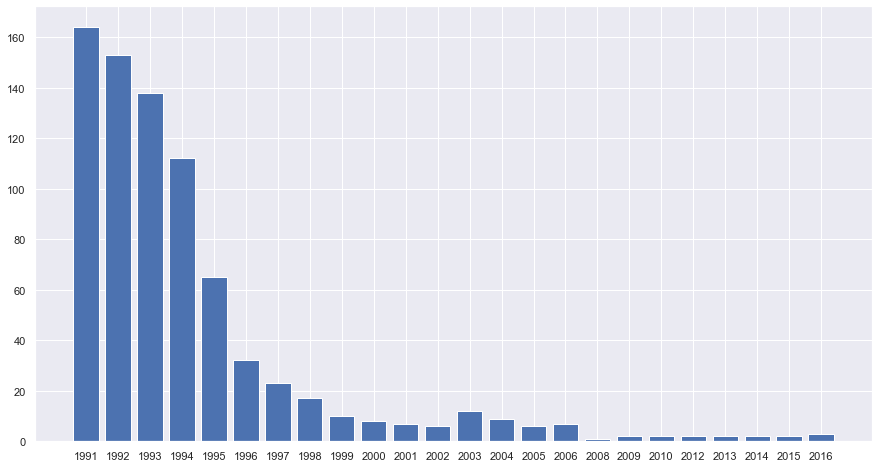

In [125]:
sns.set(rc = {'figure.figsize':(15,8)})
plt.bar(nombrena(internet).index,nombrena(internet).values)

Il y a beaucoup de valeurs manquantes pour les annees entre 1990 et 1996. Internet n'etait pas bien prise en compte dans les pays avant l'annee 1997, surtout pour les pays avec peu de ressources et donc les informations sur ces annees ne sont pas pertinentes pour l'etude. Nous allons donc etudier les donnees entre 1997 et 2016

In [126]:
internet= internet.drop(['1991', '1992', '1993',
       '1994', '1995', '1996','Topic'],axis=1)

dataFinal= dataFinal.drop(['1991', '1992', '1993',
       '1994', '1995', '1996'],axis=1)

internet.head()

,Country Code,Region,Income Group,Indicator Code,Country Name,Indicator Name,1997,1998,1999,2000,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
232,AFG,South Asia,Low income,IT.NET.USER.P2,Afghanistan,Internet users (per 100 people),NaN,NaN,NaN,NaN,...,1.900000,1.84,3.55,4.0,5.0,5.454545,5.9,7.0,8.260000,10.595726
233,ALB,Europe & Central Asia,Upper middle income,IT.NET.USER.P2,Albania,Internet users (per 100 people),0.048594,0.065027,0.081437,0.114097,...,15.036115,23.86,41.20,45.0,49.0,54.655959,57.2,60.1,63.252933,66.363445
234,DZA,Middle East & North Africa,Upper middle income,IT.NET.USER.P2,Algeria,Internet users (per 100 people),0.010268,0.020239,0.199524,0.491706,...,9.451191,10.18,11.23,12.5,14.9,18.200000,22.5,29.5,38.200000,42.945527
235,AND,Europe & Central Asia,High income: nonOECD,IT.NET.USER.P2,Andorra,Internet users (per 100 people),3.050175,6.886209,7.635686,10.538836,...,70.870000,70.04,78.53,81.0,81.0,86.434425,94.0,95.9,96.910000,97.930637
236,AGO,Sub-Saharan Africa,Upper middle income,IT.NET.USER.P2,Angola,Internet users (per 100 people),0.005674,0.018454,0.071964,0.105046,...,1.700000,1.90,2.30,2.8,3.1,6.500000,8.9,10.2,12.400000,13.000000


On remarque qu'il y a beaucoup de valeurs manquantes pour les annees avant 2000. Nous allons tout d'abord remplacer les valeurs manquante par la valeur qui precede

In [127]:
years=['1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015','2016']

In [128]:
internet[years]=internet[years].fillna(method='bfill',axis=1)

In [129]:
nombrena(internet[years])

2012    1
2013    2
2014    2
2015    2
2016    3
dtype: int64

In [130]:
internet[years]=internet[years].fillna(method='ffill',axis=1)

In [131]:
nombrena(internet)

Series([], dtype: int64)

In [132]:
internet['2016'].describe()

count    203.000000
mean      51.051608
std       28.538088
min        0.000000
25%       25.306275
50%       53.226773
75%       76.143368
max       98.240016
Name: 2016, dtype: float64

<AxesSubplot:ylabel='Frequency'>

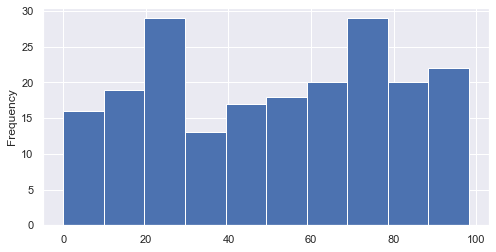

In [133]:
internet['2016'].plot(kind='hist', figsize=(8,4))

On observe l'utilisation d'internet dans les pays en 2016. La moyenne d'utilisation est de 48,5% et la mediane est 50,1%. On choisit de ne pas etudier les pays avec une utilisation internet inferieure a 50% en 2015 comme l'academie doit imperativement utiliser l'internet.

In [134]:
internet=internet[internet['2016']>50]
internet['2016'].describe()

count    108.000000
mean      74.520524
std       13.745646
min       50.001637
25%       61.832048
50%       75.249252
75%       85.845775
max       98.240016
Name: 2016, dtype: float64

<AxesSubplot:ylabel='Frequency'>

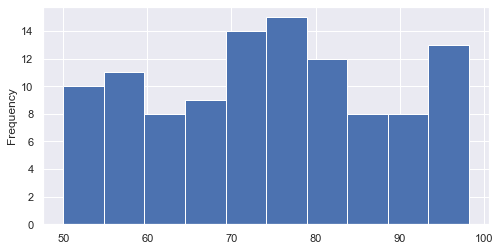

In [135]:
internet['2016'].plot(kind='hist', figsize=(8,4))

In [136]:
def datatoplot(datafr):
    datafr.index=datafr['Country Code']
    years=['1997','1998','1999','2000','2001', '2002', '2003', '2004', '2005','2006', '2007', '2008', '2009','2010','2011', '2012', '2013', '2014', '2015','2016']
    y=datafr[years]
    y=y.transpose()
    y['years']=y.index
    return(y)

In [137]:
y=datatoplot(internet)
y.head()

Country Code,ALB,AND,ATG,ARG,ARM,ABW,AUS,AUT,AZE,BHS,...,TUR,UKR,ARE,GBR,USA,URY,VEN,VIR,PSE,years
1997,0.048594,3.050175,3.480537,0.280340,0.111651,4.506179,16.369358,9.533974,0.025188,1.362954,...,0.473695,0.198822,3.295593,7.385399,21.616401,3.363240,0.390959,6.948369,1.111306,1997
1998,0.065027,6.886209,4.071716,0.830767,0.128659,4.506179,30.813239,15.421219,0.037485,2.335591,...,0.698805,0.301076,6.908303,13.669983,30.093197,6.987069,1.383990,9.245220,1.111306,1998
1999,0.081437,7.635686,5.300681,3.284482,0.970738,4.506179,40.783784,23.044317,0.099229,3.764558,...,2.292118,0.405385,14.942699,21.293638,35.848724,9.972765,2.839826,11.074606,1.111306,1999
2000,0.114097,10.538836,6.482226,7.038683,1.300470,15.442823,46.756116,33.730133,0.147758,8.000000,...,3.761685,0.716184,23.625301,26.821754,43.079163,10.539058,3.359597,13.815081,1.111306,2000
2001,0.325798,11.260469,8.899286,9.780807,1.631095,17.100000,52.689266,39.185450,0.305565,11.800000,...,5.189481,1.238760,26.271754,33.481095,49.080832,11.121438,4.636001,18.375766,1.836855,2001


<AxesSubplot:>

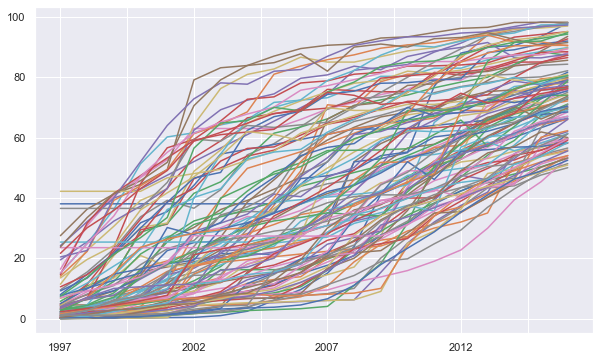

In [138]:
y.plot(kind='line',figsize=(10,6), legend= False)

On peut voir que la croissance de l'utilisation d'internet en fonction des annees est lineaire. Je choisis donc de faire une regression lineaire afin de predire les informations pour les annees 2020, 2025 et 2030

## Prediction pour les annees en cours

In [139]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
lin_reg=LinearRegression()

In [140]:
def predictY(datafr, years,X_new):
    y=datafr[years]
    X = np.arange(1, len(years)+1)
    X = sm.add_constant(X)
    y=y.transpose()
    lin_reg.fit(X,y)
    print('Le score de regression =',lin_reg.score(X,y))
    X_new = sm.add_constant(X_new)
    Y_new=lin_reg.predict(X_new)
    YT=Y_new.transpose()
    return(YT)

In [141]:
years=['1997','1998','1999','2000','2001', '2002', '2003', '2004', '2005','2006', '2007', '2008', '2009','2010','2011', '2012', '2013', '2014', '2015','2016']
X_new=np.arange(25,36)
YT=predictY(internet,years,X_new)

Le score de regression = 0.9178244185204129


On a un tres bon score de regression. On enregistre les valeurs de prediction dans une table prediction

In [142]:
def fillprediction(datafr,YT):
    datafr['2021']=YT[:,[0]]
    datafr['2026']=YT[:,[5]]
    datafr['2031']=YT[:,[10]]
    return(datafr)

In [143]:
internet=fillprediction(internet,YT)

In [144]:
internet.head(5)

,Country Code,Region,Income Group,Indicator Code,Country Name,Indicator Name,1997,1998,1999,2000,...,2010,2011,2012,2013,2014,2015,2016,2021,2026,2031
Country Code,,,,,,,,,,,,,,,,,,,,,
ALB,ALB,Europe & Central Asia,Upper middle income,IT.NET.USER.P2,Albania,Internet users (per 100 people),0.048594,0.065027,0.081437,0.114097,...,45.0,49.0,54.655959,57.2,60.100000,63.252933,66.363445,85.541568,106.491425,127.441283
AND,AND,Europe & Central Asia,High income: nonOECD,IT.NET.USER.P2,Andorra,Internet users (per 100 people),3.050175,6.886209,7.635686,10.538836,...,81.0,81.0,86.434425,94.0,95.900000,96.910000,97.930637,139.234060,169.484186,199.734312
ATG,ATG,Latin America & Caribbean,High income: nonOECD,IT.NET.USER.P2,Antigua and Barbuda,Internet users (per 100 people),3.480537,4.071716,5.300681,6.482226,...,47.0,52.0,58.000000,63.4,67.780000,70.000000,73.000000,92.530608,112.637548,132.744488
ARG,ARG,Latin America & Caribbean,Upper middle income,IT.NET.USER.P2,Argentina,Internet users (per 100 people),0.280340,0.830767,3.284482,7.038683,...,45.0,51.0,55.800000,59.9,64.700000,68.043064,70.150764,87.887157,107.824996,127.762836
ARM,ARM,Europe & Central Asia,Lower middle income,IT.NET.USER.P2,Armenia,Internet users (per 100 people),0.111651,0.128659,0.970738,1.300470,...,25.0,32.0,37.500000,41.9,54.622806,59.102378,62.000000,65.994133,82.438344,98.882555


On regroupe les indicateurs dans une meme table **Indicateurs** en prenent la valeur de 2025 afin de les resume et d'en retirer les fonctions de score

In [145]:
Indicateurs=internet[['Country Name', 'Region']]
Indicateurs['Internet']=internet['2021']
Indicateurs15=internet[['Country Name', 'Region']]
Indicateurs15['Internet']=internet['2016']

C:\Users\marwa\AppData\Local\Temp/ipykernel_10628/1617115458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Indicateurs['Internet']=internet['2021']
C:\Users\marwa\AppData\Local\Temp/ipykernel_10628/1617115458.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Indicateurs15['Internet']=internet['2016']


In [146]:
Indicateurs15.head(2)

,Country Name,Region,Internet
Country Code,,,
ALB,Albania,Europe & Central Asia,66.363445
AND,Andorra,Europe & Central Asia,97.930637


## Calcul de la croissance par tranches de 5 ans

In [147]:
def calculateGrowth(datafr, Growth):
   
    Growth['1997-2001']=(datafr['2001']-datafr['1997'])/datafr['1997']
    Growth['2002-2006']=(datafr['2006']-datafr['2002'])/datafr['2002']
    Growth['2007-2011']=(datafr['2011']-datafr['2007'])/datafr['2007']
    Growth['2012-2016']=(datafr['2016']-datafr['2012'])/datafr['2012']
    Growth['2016-2021']=(datafr['2021']-datafr['2016'])/datafr['2016']
    Growth['2021-2026']=(datafr['2026']-datafr['2021'])/datafr['2021']
    Growth['2026-2031']=(datafr['2031']-datafr['2026'])/datafr['2026']
    return(Growth)

In [148]:
InternetGrowth=internet[['Country Name', 'Region']]
InternetGrowth=calculateGrowth(internet, InternetGrowth)
InternetGrowth.head(2)

C:\Users\marwa\AppData\Local\Temp/ipykernel_10628/2571176275.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Growth['1997-2001']=(datafr['2001']-datafr['1997'])/datafr['1997']
C:\Users\marwa\AppData\Local\Temp/ipykernel_10628/2571176275.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Growth['2002-2006']=(datafr['2006']-datafr['2002'])/datafr['2002']
C:\Users\marwa\AppData\Local\Temp/ipykernel_10628/2571176275.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

,Country Name,Region,1997-2001,2002-2006,2007-2011,2012-2016,2016-2021,2021-2026,2026-2031
Country Code,,,,,,,,,
ALB,Albania,Europe & Central Asia,5.704509,23.635869,2.258820,0.214203,0.288986,0.244908,0.196728
AND,Andorra,Europe & Central Asia,2.691745,3.345898,0.142938,0.133005,0.421762,0.217261,0.178483


Pour les indicateurs suivants nous allons travailler avec la liste des pays retenus apres l'etude de l'indicateur Internet. A savoir 108 pays

In [149]:
countrylist=internet.index

## Indicateur GDP

In [150]:
GDP=dataFinal[dataFinal['Indicator Code']=='NY.GDP.MKTP.KD']

In [151]:
GDP=GDP.loc[GDP['Country Code'].isin(countrylist)]
GDP.shape

(101, 27)

In [152]:
nombrena(GDP)

1997    4
1998    4
1999    4
2000    3
2001    2
2014    2
2015    3
2016    7
dtype: int64

In [153]:
GDP[years]=GDP[years].fillna(method='bfill',axis=1)
nombrena(GDP)

2014    2
2015    3
2016    7
dtype: int64

In [154]:
GDP[years]=GDP[years].fillna(method='ffill',axis=1)
nombrena(GDP)

Series([], dtype: int64)

## Calcul du GDP per Capita (GDP/population totale)
POur avoir une information normalisee sur tous les pays

In [155]:
PopTot=dataFinal[dataFinal['Indicator Code']=='SP.POP.TOTL']
PopTot=PopTot.loc[PopTot['Country Code'].isin(countrylist)]
PopTot.index=PopTot['Country Code']
PopTot.shape

(108, 27)

In [156]:
nombrena(PopTot)

Series([], dtype: int64)

In [157]:
GDP.index=GDP['Country Code']
GDP.shape

(101, 27)

In [158]:
PopTot=PopTot.loc[PopTot['Country Code'].isin(GDP['Country Code'])]
PopTot.shape

(101, 27)

In [159]:
years=['1997','1998','1999','2000','2001', '2002', '2003', '2004', '2005','2006', '2007', '2008', '2009','2010','2011', '2012', '2013', '2014', '2015','2016']
GDPPerCapita=GDP[years]/PopTot[years]

In [160]:
nombrena(GDPPerCapita)

Series([], dtype: int64)

In [161]:
#years=['1997','1998','1999','2000','2001','2002','2003','2004','2005','2006', '2007', '2008', '2009','2010','2011', '2012', '2013', '2014', '2015','2016']
X_new=np.arange(25,36)
YT=predictY(GDPPerCapita,years,X_new)

Le score de regression = 0.7434139028734315


Le score de regression est assez satisfaisant

In [162]:
GDPPerCapita=fillprediction(GDPPerCapita, YT)
GDPPerCapita.head(2)

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2021,2026,2031
Country Code,,,,,,,,,,,,,,,,,,,,,
ALB,1738.166460,1906.717261,2177.896633,2337.942386,2547.377316,2663.140477,2827.455778,3001.408618,3189.395111,3383.893726,...,4094.358832,4210.082199,4276.921550,4327.644518,4413.561583,4524.990993,4684.967034,5652.352799,6435.571563,7218.790328
AND,37293.282413,38595.723210,40035.482449,40801.542130,41420.846178,42396.302398,45519.492384,47032.866888,48831.929360,49708.400489,...,39736.354063,38205.771089,38190.586585,39104.301849,40785.049228,41765.920353,42681.603824,42233.080371,42197.988480,42162.896589


In [163]:
GDPPerCapita=GDPPerCapita.join(GDP[['Country Name','Region']])

In [164]:
GDPPerCapita['2021'].describe()

count       101.000000
mean      26762.632549
std       23401.492855
min        2351.522888
25%        8534.421423
50%       17487.062693
75%       39572.256402
max      118373.318079
Name: 2021, dtype: float64

In [165]:
Indicateurs=pd.merge(Indicateurs, GDPPerCapita[['Country Name','2021']], how='inner') 
Indicateurs=Indicateurs.rename(columns={'2021': 'GDPPerCapita'})
Indicateurs15=pd.merge(Indicateurs15, GDPPerCapita[['Country Name','2016']], how='inner') 
Indicateurs15=Indicateurs15.rename(columns={'2016': 'GDPPerCapita'})
Indicateurs15.head(2)
#Je prend en compte uniquement les pays avec les 2 indicateurs

,Country Name,Region,Internet,GDPPerCapita
0,Albania,Europe & Central Asia,66.363445,4684.967034
1,Andorra,Europe & Central Asia,97.930637,42681.603824


In [166]:
Indicateurs15

,Country Name,Region,Internet,GDPPerCapita
0,Albania,Europe & Central Asia,66.363445,4684.967034
1,Andorra,Europe & Central Asia,97.930637,42681.603824
2,Antigua and Barbuda,Latin America & Caribbean,73.000000,13315.508631
3,Argentina,Latin America & Caribbean,70.150764,10153.997912
4,Armenia,Europe & Central Asia,62.000000,3932.554617
...,...,...,...,...
96,United States,North America,76.176737,52262.784161
97,Uruguay,Latin America & Caribbean,66.400000,14009.998440
98,"Venezuela, RB",Latin America & Caribbean,60.000000,13348.630437
99,Virgin Islands (U.S.),Latin America & Caribbean,59.608316,30747.592564


### Calcul de la croissance sur 5 ans

In [167]:
GDPPerCapitaGrowth=GDPPerCapita[["Country Name", 'Region']]
GDPPerCapitaGrowth=calculateGrowth(GDPPerCapita,GDPPerCapitaGrowth)

C:\Users\marwa\AppData\Local\Temp/ipykernel_10628/2571176275.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Growth['1997-2001']=(datafr['2001']-datafr['1997'])/datafr['1997']
C:\Users\marwa\AppData\Local\Temp/ipykernel_10628/2571176275.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Growth['2002-2006']=(datafr['2006']-datafr['2002'])/datafr['2002']
C:\Users\marwa\AppData\Local\Temp/ipykernel_10628/2571176275.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [168]:
GDPPerCapitaGrowth.head(2)

,Country Name,Region,1997-2001,2002-2006,2007-2011,2012-2016,2016-2021,2021-2026,2026-2031
Country Code,,,,,,,,,
ALB,Albania,Europe & Central Asia,0.465554,0.27064,0.165993,0.095406,0.206487,0.138565,0.121702
AND,Andorra,Europe & Central Asia,0.110678,0.17247,-0.215659,0.117595,-0.010509,-0.000831,-0.000832


## Population totale

In [169]:
PopTot.head(2)

,Country Code,Region,Income Group,Indicator Code,Topic,Country Name,Indicator Name,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Code,,,,,,,,,,,,,,,,,,,,,
ALB,ALB,Europe & Central Asia,Upper middle income,SP.POP.TOTL,Health: Population: Structure,Albania,"Population, total",3148281.0,3128530.0,3108778.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
AND,AND,Europe & Central Asia,High income: nonOECD,SP.POP.TOTL,Health: Population: Structure,Andorra,"Population, total",64327.0,64142.0,64370.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


In [170]:
years=['1997','1998','1999','2000','2001','2002','2003','2004','2005','2006', '2007', '2008', '2009','2010','2011', '2012', '2013', '2014', '2015','2016']
X_new=np.arange(25,36)
YT=predictY(PopTot,years,X_new)


Le score de regression = 0.9024955265892507


In [171]:
PopTot=fillprediction(PopTot, YT)
PopTot.head(2)

,Country Code,Region,Income Group,Indicator Code,Topic,Country Name,Indicator Name,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2021,2026,2031
Country Code,,,,,,,,,,,,,,,,,,,,,
ALB,ALB,Europe & Central Asia,Upper middle income,SP.POP.TOTL,Health: Population: Structure,Albania,"Population, total",3148281.0,3128530.0,3108778.0,...,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2.771427e+06,2.696732e+06,2.622037e+06
AND,AND,Europe & Central Asia,High income: nonOECD,SP.POP.TOTL,Health: Population: Structure,Andorra,"Population, total",64327.0,64142.0,64370.0,...,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,9.060168e+04,9.560491e+04,1.006081e+05


In [172]:
PopTot['2021'].describe()

count    1.010000e+02
mean     3.836762e+07
std      1.468556e+08
min      5.663390e+04
25%      1.818143e+06
50%      6.364389e+06
75%      2.538831e+07
max      1.419392e+09
Name: 2021, dtype: float64

In [173]:
Indicateurs=pd.merge(Indicateurs, PopTot[['Country Name','2021']], how='inner')
Indicateurs=Indicateurs.rename(columns={'2021': 'Population'})
Indicateurs15=pd.merge(Indicateurs15, PopTot[['Country Name','2016']], how='inner')
Indicateurs15=Indicateurs15.rename(columns={'2016': 'Population'})
Indicateurs.head(2)

,Country Name,Region,Internet,GDPPerCapita,Population
0,Albania,Europe & Central Asia,85.541568,5652.352799,2.771427e+06
1,Andorra,Europe & Central Asia,139.234060,42233.080371,9.060168e+04


In [174]:
Indicateurs15.describe()

,Internet,GDPPerCapita,Population
count,101.000000,101.000000,1.010000e+02
mean,73.711101,24700.112362,3.711089e+07
std,13.536622,21737.057786,1.425011e+08
min,50.001637,2062.681788,5.482100e+04
25%,61.324253,7525.855326,1.960424e+06
50%,74.376646,15872.722787,6.006668e+06
75%,82.169700,36844.450082,2.412716e+07
max,98.240016,108422.470571,1.378665e+09


### Calcul de la croissance

In [175]:
PopTotGrowth=PopTot[['Country Name', 'Region']]
PopTotGrowth=calculateGrowth(PopTot, PopTotGrowth)
PopTotGrowth.head(2)

C:\Users\marwa\AppData\Local\Temp/ipykernel_10628/2571176275.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Growth['1997-2001']=(datafr['2001']-datafr['1997'])/datafr['1997']
C:\Users\marwa\AppData\Local\Temp/ipykernel_10628/2571176275.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Growth['2002-2006']=(datafr['2006']-datafr['2002'])/datafr['2002']
C:\Users\marwa\AppData\Local\Temp/ipykernel_10628/2571176275.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

,Country Name,Region,1997-2001,2002-2006,2007-2011,2012-2016,2016-2021,2021-2026,2026-2031
Country Code,,,,,,,,,
ALB,Albania,Europe & Central Asia,-0.027986,-0.019162,-0.021825,-0.008378,-0.036394,-0.026952,-0.027698
AND,Andorra,Europe & Central Asia,0.046854,0.156205,0.012917,-0.062476,0.172367,0.055222,0.052332


# Pourcentage de la population entre 15 et 24 ans

In [176]:
pop1524=dataFinal[dataFinal['Indicator Code']=='SP.POP.1524.TO.UN']
pop1524=pop1524.loc[pop1524['Country Code'].isin(countrylist)]
pop1524.shape

(97, 27)

In [177]:
nombrena(pop1524)

1997     6
1998     3
1999     2
2000     1
2006     4
2007     7
2008     7
2009     7
2010     7
2011     7
2012     7
2013     7
2014     7
2015     7
2016    97
dtype: int64

In [178]:
pop1524[years]=pop1524[years].fillna(method='ffill',axis=1)

In [179]:
nombrena(pop1524)

1997    6
1998    3
1999    2
2000    1
dtype: int64

In [180]:
pop1524[years]=pop1524[years].fillna(method='bfill',axis=1)

In [181]:
nombrena(pop1524)

Series([], dtype: int64)

In [182]:
PopTot=PopTot.loc[PopTot['Country Code'].isin(pop1524['Country Code'])]
PopTot.shape

(95, 30)

In [183]:
pop1524=pop1524.loc[pop1524['Country Code'].isin(PopTot['Country Code'])]
pop1524.index=pop1524['Country Code']

In [184]:
PctPop1524=100*pop1524[years]/PopTot[years]
PctPop1524.describe()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,16.378091,16.322974,16.316998,16.295823,16.245180,16.240655,16.246441,16.217975,16.132329,16.020192,15.865946,15.670313,15.462321,15.228477,14.974097,14.676654,14.363949,14.051830,13.748442,13.620956
std,2.925302,2.993804,3.109848,3.196892,3.246054,3.303891,3.347353,3.364788,3.404228,3.469757,3.501197,3.532868,3.547310,3.519821,3.459259,3.391956,3.327864,3.280598,3.250611,3.188118
min,11.004028,11.004663,11.041854,10.943994,10.656212,9.934474,9.751032,10.485188,10.279750,10.139973,9.651212,8.321277,7.317354,6.612383,6.126214,5.781041,5.535681,5.354236,5.213619,5.034547
25%,14.030251,14.026095,14.016856,14.068106,14.000589,13.792701,13.689803,13.516477,13.189894,12.958407,12.769980,12.710209,12.604174,12.425643,12.382976,12.337969,11.934832,11.709235,11.387650,11.358423
50%,16.353450,16.203609,16.053726,16.144847,16.164777,16.111613,16.056825,15.909019,15.825638,15.658085,15.486771,15.211002,14.983661,14.733393,14.242587,14.040526,13.890252,13.718119,13.384229,13.187904
75%,18.757284,18.605192,18.743648,19.036788,18.810625,18.833669,19.096516,19.035237,18.946338,18.725362,18.667689,18.717822,18.430137,17.950903,17.405787,16.953571,16.589207,16.342446,15.986136,15.795769
max,22.605644,22.969367,23.297182,23.780443,24.279827,24.642537,24.863887,24.945374,24.887909,24.698895,24.376468,23.905488,23.328795,23.608816,23.631692,23.440240,23.540511,23.679541,23.812075,23.134983


In [185]:
PctPop1524=PctPop1524.join(PopTot[['Country Name','Region']])

In [186]:
years=['1997','1998','1999','2000','2001', '2002', '2003', '2004', '2005','2006', '2007', '2008', '2009','2010','2011', '2012', '2013', '2014', '2015','2016']
X_new=np.arange(25, 36)
YT=predictY(PctPop1524, years, X_new)

Le score de regression = 0.6154961068919406


In [187]:
PctPop1524=fillprediction(PctPop1524,YT)
PctPop1524.head(2)

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2012,2013,2014,2015,2016,Country Name,Region,2021,2026,2031
Country Code,,,,,,,,,,,,,,,,,,,,,
ALB,16.915834,16.986316,17.166102,17.424613,17.815594,18.174539,18.595013,19.031603,19.460453,19.878117,...,20.483409,20.117185,19.709467,19.310182,19.341080,Albania,Europe & Central Asia,21.80858,22.711825,23.615070
AND,12.926143,12.963425,12.157838,11.387062,10.656212,9.934474,9.751032,10.863806,10.731992,10.760455,...,10.572479,10.787493,11.000593,11.171072,11.277028,Andorra,Europe & Central Asia,10.03422,9.719857,9.405493


In [188]:
PctPop1524['2021'].describe()

count    95.000000
mean     13.363416
std       4.019556
min       0.711509
25%      10.923299
50%      12.950496
75%      15.930660
max      25.350054
Name: 2021, dtype: float64

In [189]:
PctPop1524Growth=PctPop1524[['Country Name', 'Region']]
PctPop1524Growth=calculateGrowth(PctPop1524,PctPop1524Growth)

C:\Users\marwa\AppData\Local\Temp/ipykernel_10628/2571176275.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Growth['1997-2001']=(datafr['2001']-datafr['1997'])/datafr['1997']
C:\Users\marwa\AppData\Local\Temp/ipykernel_10628/2571176275.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Growth['2002-2006']=(datafr['2006']-datafr['2002'])/datafr['2002']
C:\Users\marwa\AppData\Local\Temp/ipykernel_10628/2571176275.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [190]:
Indicateurs=pd.merge(Indicateurs,PctPop1524[['Country Name', '2021']], how='inner')
Indicateurs=Indicateurs.rename(columns={'2021':'Population:15-25ans'})
Indicateurs15=pd.merge(Indicateurs15,PctPop1524[['Country Name', '2016']], how='inner')
Indicateurs15=Indicateurs15.rename(columns={'2016':'Population:15-25ans'})

In [191]:
Indicateurs.head()

,Country Name,Region,Internet,GDPPerCapita,Population,Population:15-25ans
0,Albania,Europe & Central Asia,85.541568,5652.352799,2.771427e+06,21.808580
1,Andorra,Europe & Central Asia,139.234060,42233.080371,9.060168e+04,10.034220
2,Antigua and Barbuda,Latin America & Caribbean,92.530608,13711.359576,1.072198e+05,13.186658
3,Argentina,Latin America & Caribbean,87.887157,11637.029577,4.589733e+07,15.256351
4,Armenia,Europe & Central Asia,65.994133,5086.517939,2.783673e+06,18.137383


## Depenses sur l'education 

In [192]:
depenses=dataFinal[dataFinal['Indicator Code']=='SE.XPD.TOTL.GD.ZS']
depenses=depenses.loc[depenses['Country Code'].isin(countrylist)]
depenses.shape

(92, 27)

In [193]:
nombrena(depenses)

1997    72
1998    37
1999    27
2000    26
2001    23
2002    15
2003    22
2004    17
2005    24
2006    23
2007    19
2008    23
2009    21
2010    25
2011    23
2012    28
2013    29
2014    41
2015    72
2016    91
dtype: int64

In [194]:
depenses[years]=depenses[years].fillna(method="bfill",axis=1)

In [195]:
nombrena(depenses)

2000     1
2001     1
2002     1
2003     2
2004     3
2005     3
2006     4
2007     5
2008     6
2009     7
2010    10
2011    11
2012    16
2013    20
2014    37
2015    71
2016    91
dtype: int64

In [196]:
depenses[years]=depenses[years].fillna(method="ffill",axis=1)

In [197]:
nombrena(depenses)

Series([], dtype: int64)

In [198]:
depenses.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
1997,92.0,4.266764,1.445285,0.00000,3.356890,4.274525,5.293148,8.07941
1998,92.0,4.318050,1.555292,0.00000,3.374230,4.274525,5.435895,8.33291
1999,92.0,4.317900,1.438006,1.19528,3.423312,4.263725,5.443010,7.94089
2000,92.0,4.285116,1.432402,1.15093,3.318990,4.159575,5.340620,8.06556
2001,92.0,4.366077,1.495044,1.24386,3.330735,4.212115,5.332647,8.22460
2002,92.0,4.437882,1.533673,1.24386,3.457547,4.279440,5.438740,8.21461
2003,92.0,4.454625,1.565463,1.24386,3.425100,4.336520,5.392612,8.63783
2004,92.0,4.335939,1.449635,1.24386,3.445250,4.367315,5.321082,8.18589
2005,92.0,4.314345,1.413909,1.32877,3.350003,4.266880,5.235625,8.06515
2006,92.0,4.301064,1.367522,1.32877,3.260593,4.313770,5.138475,7.74031


In [199]:
years=['1997','1998','1999','2000','2001', '2002', '2003', '2004', '2005','2006', '2007', '2008', '2009','2010','2011', '2012', '2013', '2014', '2015','2016']
X_new=np.arange(25, 36)
YT=predictY(depenses, years, X_new)

Le score de regression = 0.40167640489219403


In [200]:
depenses=fillprediction(depenses,YT)

In [201]:
depenses['2021'].describe()

count    92.000000
mean      4.736311
std       1.904847
min       1.288312
25%       3.287346
50%       4.800850
75%       5.956576
max      10.057696
Name: 2021, dtype: float64

In [202]:
depensesGrowth=depenses[['Country Name', 'Region']]
depensesGrowth=calculateGrowth(depenses,depensesGrowth)

C:\Users\marwa\AppData\Local\Temp/ipykernel_10628/2571176275.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Growth['1997-2001']=(datafr['2001']-datafr['1997'])/datafr['1997']
C:\Users\marwa\AppData\Local\Temp/ipykernel_10628/2571176275.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Growth['2002-2006']=(datafr['2006']-datafr['2002'])/datafr['2002']
C:\Users\marwa\AppData\Local\Temp/ipykernel_10628/2571176275.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [203]:
depensesGrowth.head(2)

,Country Name,Region,1997-2001,2002-2006,2007-2011,2012-2016,2016-2021,2021-2026,2026-2031
14398,Albania,Europe & Central Asia,0.032934,0.033621,0.083206,0.000000,0.037409,0.028444,0.027657
14399,Andorra,Europe & Central Asia,-0.543035,0.292986,0.523054,0.321248,0.042633,0.101462,0.092116


A priori il n'y a pas trop de changement dans la depense des pays sur l'education. Je garde les predictions que j'ai eu par la regression lineaire bien que cela ne soit pas tres precis

In [204]:
Indicateurs=pd.merge(Indicateurs,depenses[['Country Name', '2021']], how='inner')
Indicateurs=Indicateurs.rename(columns={'2021':'DepensesSurEducation'})
Indicateurs15=pd.merge(Indicateurs15,depenses[['Country Name', '2016']], how='inner')
Indicateurs15=Indicateurs15.rename(columns={'2016':'DepensesSurEducation'})
Indicateurs.head(2)


,Country Name,Region,Internet,GDPPerCapita,Population,Population:15-25ans,DepensesSurEducation
0,Albania,Europe & Central Asia,85.541568,5652.352799,2.771427e+06,21.80858,3.671847
1,Andorra,Europe & Central Asia,139.234060,42233.080371,9.060168e+04,10.03422,3.392395


In [205]:
depensesGrowth=depenses[['Country Name', 'Region']]
depensesGrowth=calculateGrowth(depenses, depensesGrowth)
depensesGrowth.head(2)

C:\Users\marwa\AppData\Local\Temp/ipykernel_10628/2571176275.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Growth['1997-2001']=(datafr['2001']-datafr['1997'])/datafr['1997']
C:\Users\marwa\AppData\Local\Temp/ipykernel_10628/2571176275.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Growth['2002-2006']=(datafr['2006']-datafr['2002'])/datafr['2002']
C:\Users\marwa\AppData\Local\Temp/ipykernel_10628/2571176275.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

,Country Name,Region,1997-2001,2002-2006,2007-2011,2012-2016,2016-2021,2021-2026,2026-2031
14398,Albania,Europe & Central Asia,0.032934,0.033621,0.083206,0.000000,0.037409,0.028444,0.027657
14399,Andorra,Europe & Central Asia,-0.543035,0.292986,0.523054,0.321248,0.042633,0.101462,0.092116


# Pourcentage de scolarisation secondaire

In [206]:
scolarisationSec=dataFinal.loc[dataFinal['Indicator Code']=='SE.SEC.ENRR']

In [207]:
scolarisationSec=scolarisationSec.loc[scolarisationSec['Country Code'].isin(countrylist)]
scolarisationSec.shape

(96, 27)

In [208]:
nombrena(scolarisationSec)

1997    39
1998    31
1999    14
2000    14
2001    18
2002    13
2003    14
2004    11
2005     9
2006    13
2007     8
2008     9
2009    10
2010    10
2011    12
2012    14
2013    16
2014    14
2015    29
2016    94
dtype: int64

In [209]:
scolarisationSec[years]=scolarisationSec[years].fillna(method='bfill',axis=1)

In [210]:
nombrena(scolarisationSec)

1998     1
1999     2
2000     2
2001     2
2002     2
2003     2
2004     2
2005     3
2006     3
2007     3
2008     3
2009     3
2010     3
2011     4
2012     4
2013     7
2014    10
2015    29
2016    94
dtype: int64

In [211]:
scolarisationSec[years]=scolarisationSec[years].fillna(method='ffill',axis=1)

In [212]:
YT=predictY(scolarisationSec,years,X_new)

Le score de regression = 0.4930937831366502


In [213]:
scolarisationSec=fillprediction(scolarisationSec, YT)
scolarisationSec['2021'].describe()

count     96.000000
mean     103.561636
std       15.749104
min       55.983309
25%       94.680302
50%      104.727927
75%      111.466430
max      143.753499
Name: 2021, dtype: float64

Cet indicateur n'est pas tres pertinant, nombre eleve de valeurs manquantes, moyennes des pourcentage superieure a 100%, 25% des pays ont un score superieur a 25%. Ces informations ne nous serviront pas a differentier les pays avec des taux superieurs a 100%, et le score de la regression est inferieur a 50%. On regarde le taux de scolarisation du tertiaire

## Pourcentage de scolarisation du tertiaire

In [214]:
scolarisation=dataFinal.loc[dataFinal['Indicator Code']=='SE.TER.ENRR']

In [215]:
scolarisation=scolarisation.loc[scolarisation['Country Code'].isin(countrylist)]
scolarisation.shape

(90, 27)

In [216]:
nombrena(scolarisation)

1997    35
1998    32
1999    17
2000    21
2001    19
2002    17
2003    14
2004    15
2005    19
2006    16
2007    16
2008    13
2009    15
2010    16
2011    15
2012    11
2013    13
2014    14
2015    29
2016    89
dtype: int64

In [217]:
scolarisation[years]=scolarisation[years].fillna(method='bfill',axis=1)

In [218]:
nombrena(scolarisation)

1999     1
2000     1
2001     2
2002     2
2003     2
2004     2
2005     3
2006     3
2007     3
2008     3
2009     3
2010     4
2011     6
2012     7
2013     9
2014    13
2015    29
2016    89
dtype: int64

In [219]:
scolarisation[years]=scolarisation[years].fillna(method='ffill',axis=1)

In [220]:
nombrena(scolarisation)

Series([], dtype: int64)

In [221]:
YT=predictY(scolarisation,years,X_new)

Le score de regression = 0.6883024099983776


In [222]:
scolarisation=fillprediction(scolarisation, YT)
scolarisation.head()

,Country Code,Region,Income Group,Indicator Code,Topic,Country Name,Indicator Name,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2021,2026,2031
10178,ALB,Europe & Central Asia,Upper middle income,SE.TER.ENRR,Tertiary,Albania,"Gross enrolment ratio, tertiary, both sexes (%)",12.733760,13.594760,14.805040,...,44.540649,49.670399,58.565491,62.547760,62.706848,58.109951,58.109951,76.996474,92.058709,107.120943
10181,ARG,Latin America & Caribbean,Upper middle income,SE.TER.ENRR,Tertiary,Argentina,"Gross enrolment ratio, tertiary, both sexes (%)",46.089390,46.089390,47.976479,...,73.939201,77.453888,78.972878,79.986702,82.917389,82.917389,82.917389,95.994228,106.014875,116.035523
10182,ARM,Europe & Central Asia,Lower middle income,SE.TER.ENRR,Tertiary,Armenia,"Gross enrolment ratio, tertiary, both sexes (%)",22.474590,33.104969,34.620899,...,50.644299,51.001419,43.914478,43.310902,44.254608,44.309502,44.309502,54.725945,59.664930,64.603915
10183,ABW,Latin America & Caribbean,High income: nonOECD,SE.TER.ENRR,Tertiary,Aruba,"Gross enrolment ratio, tertiary, both sexes (%)",28.066771,28.066771,28.066771,...,37.357700,38.737621,37.755692,16.195829,16.405420,15.273780,15.273780,23.180340,21.401383,19.622425
10184,AUS,East Asia & Pacific,High income: OECD,SE.TER.ENRR,Tertiary,Australia,"Gross enrolment ratio, tertiary, both sexes (%)",80.427818,68.473679,67.288811,...,80.917084,83.470757,85.413918,86.554550,90.306503,90.306503,90.306503,93.686685,99.365992,105.045298


In [223]:
scolarisation['2021'].describe()

count     90.000000
mean      67.640450
std       27.874762
min        6.112482
25%       47.594695
50%       70.699554
75%       87.476786
max      146.059401
Name: 2021, dtype: float64

In [224]:
Indicateurs=pd.merge(Indicateurs,scolarisation[['Country Name', '2021']], how='inner')
Indicateurs=Indicateurs.rename(columns={'2021':'Scolarisation'})
Indicateurs15=pd.merge(Indicateurs15,scolarisation[['Country Name', '2016']], how='inner')
Indicateurs15=Indicateurs15.rename(columns={'2016':'Scolarisation'})
Indicateurs.shape

(84, 8)

In [225]:
scolarisationGrowth=scolarisation[['Country Name', 'Region']]
scolarisationGrowth=calculateGrowth(scolarisation,scolarisationGrowth )
scolarisationGrowth.head()

C:\Users\marwa\AppData\Local\Temp/ipykernel_10628/2571176275.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Growth['1997-2001']=(datafr['2001']-datafr['1997'])/datafr['1997']
C:\Users\marwa\AppData\Local\Temp/ipykernel_10628/2571176275.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Growth['2002-2006']=(datafr['2006']-datafr['2002'])/datafr['2002']
C:\Users\marwa\AppData\Local\Temp/ipykernel_10628/2571176275.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

,Country Name,Region,1997-2001,2002-2006,2007-2011,2012-2016,2016-2021,2021-2026,2026-2031
10178,Albania,Europe & Central Asia,0.254536,0.620065,0.620374,-0.007778,0.325014,0.195622,0.163616
10181,Argentina,Latin America & Caribbean,0.265638,0.073885,0.167337,0.049948,0.157709,0.104388,0.094521
10182,Armenia,Europe & Central Asia,0.460064,0.185205,0.150477,0.008995,0.235084,0.090249,0.082779
10183,Aruba,Latin America & Caribbean,0.035241,0.157511,0.141823,-0.595458,0.517656,-0.076744,-0.083123
10184,Australia,East Asia & Pacific,-0.166892,-0.056361,0.151004,0.057281,0.037430,0.060620,0.057155


# Etudier les differents indicateurs

In [226]:
Indicateurs.describe()

,Internet,GDPPerCapita,Population,Population:15-25ans,DepensesSurEducation,Scolarisation
count,84.000000,84.000000,8.400000e+01,84.000000,84.000000,84.000000
mean,96.068973,27851.107298,4.560010e+07,13.271913,4.827826,68.235225
std,22.412796,24446.396845,1.602072e+08,3.864166,1.903201,28.180794
min,49.989415,2351.522888,5.789693e+04,0.711509,1.288312,6.112482
25%,77.221753,9854.921736,3.340432e+06,10.896472,3.475628,48.175772
50%,96.520688,17528.010237,8.986734e+06,12.732240,4.868745,71.283332
75%,115.269783,42559.979062,3.706422e+07,15.925796,5.999540,88.040534
max,138.391422,118373.318079,1.419392e+09,25.350054,10.057696,146.059401


### Normalisation des indicateurs

In [227]:
sns.set(rc = {'figure.figsize':(15,7)})

In [228]:
Scores=Indicateurs[['Country Name', 'Region']]
Indic=['Internet', 'GDPPerCapita', 'Population','Scolarisation','DepensesSurEducation','Population:15-25ans']
for indic in Indic:
    Scores[indic]=Indicateurs[indic]/Indicateurs[indic].max()
Scores.describe()

C:\Users\marwa\AppData\Local\Temp/ipykernel_10628/2203920006.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Scores[indic]=Indicateurs[indic]/Indicateurs[indic].max()


,Internet,GDPPerCapita,Population,Scolarisation,DepensesSurEducation,Population:15-25ans
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,0.694183,0.235282,0.032126,0.467174,0.480013,0.523546
std,0.161952,0.206519,0.112870,0.192941,0.189228,0.152432
min,0.361218,0.019865,0.000041,0.041849,0.128092,0.028067
25%,0.557995,0.083253,0.002353,0.329837,0.345569,0.429840
50%,0.697447,0.148074,0.006331,0.488043,0.484082,0.502257
75%,0.832926,0.359540,0.026113,0.602772,0.596512,0.628235
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [229]:
Scores=Scores.dropna()

In [230]:
Scores.describe()

,Internet,GDPPerCapita,Population,Scolarisation,DepensesSurEducation,Population:15-25ans
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,0.694183,0.235282,0.032126,0.467174,0.480013,0.523546
std,0.161952,0.206519,0.112870,0.192941,0.189228,0.152432
min,0.361218,0.019865,0.000041,0.041849,0.128092,0.028067
25%,0.557995,0.083253,0.002353,0.329837,0.345569,0.429840
50%,0.697447,0.148074,0.006331,0.488043,0.484082,0.502257
75%,0.832926,0.359540,0.026113,0.602772,0.596512,0.628235
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

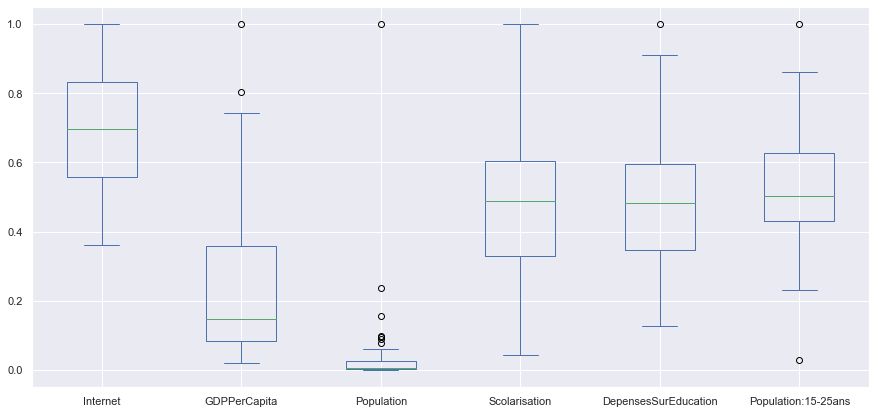

In [231]:
Scores.plot.box()

## Correlation entre les differents indicateurs

In [232]:
Scores[['Internet','GDPPerCapita', 'Population','Population:15-25ans','Scolarisation', 'DepensesSurEducation']].corr()

,Internet,GDPPerCapita,Population,Population:15-25ans,Scolarisation,DepensesSurEducation
Internet,1.000000,0.747835,-0.175967,-0.574172,0.213088,0.184997
GDPPerCapita,0.747835,1.000000,-0.092365,-0.448909,0.078821,0.137143
Population,-0.175967,-0.092365,1.000000,0.056687,-0.039563,-0.135410
Population:15-25ans,-0.574172,-0.448909,0.056687,1.000000,-0.219548,-0.086065
Scolarisation,0.213088,0.078821,-0.039563,-0.219548,1.000000,0.315133
DepensesSurEducation,0.184997,0.137143,-0.135410,-0.086065,0.315133,1.000000


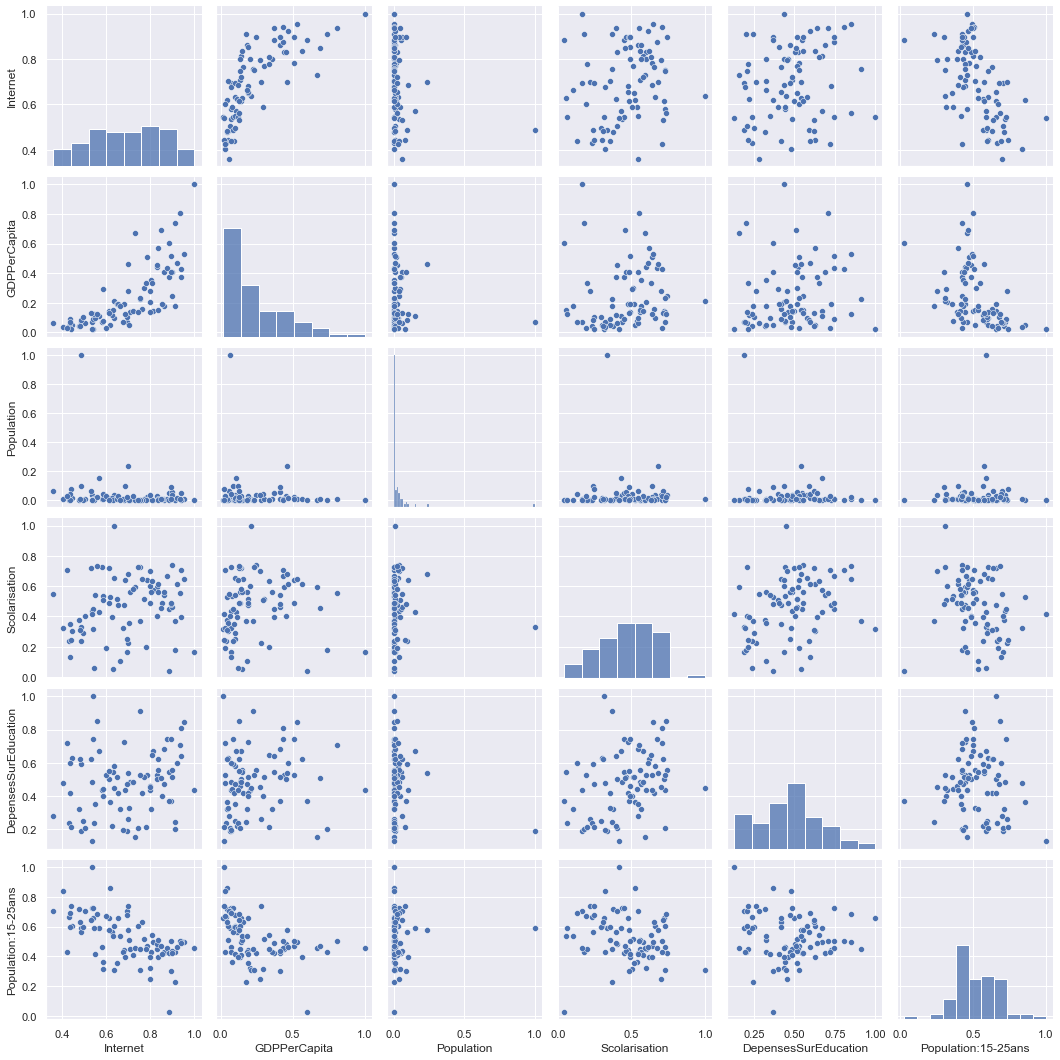

In [233]:
sns.pairplot(Scores,height=2.5)

On remarque que l'indicateur du GDP Per Capita est fortement correle a l'indicateur du pourcentage d'utilisation d'internet.

On remarque que l'indicateur du pourcentage de la population 15-25ans est moderemment negativement correle a l'indicateur du pourcentage d'utilisation d'internet ainsi qu'avec le GDPperCapita

 On a une correlation faible entre le taux de scolarisation dans le tertiaire et les depenses sur l'education

# Calcul de la fonction de score: 
Nous n'allons pas inclure l'indicateur internet dans la construction du score synthetique. En effet un premier filtrage des pays a ete effectuer en fonction des information sur internet. Cet indicateur est donc implicitement present dans notre score, et la forte correlation avec le GDPPerCapita guarantie qu'il n'y aura pas de perte d'informationpar cette omission.

Nous allons egalement enlever l'indicateur sur le taux de la population 15-25ans 

Nous utiliserons la multiplication comme fonction d'aggregation des indicateurs retenus
## La fonction du score synthetique

In [234]:
Scores['Score']=Scores['GDPPerCapita']*Scores['Scolarisation']*Scores['Population']*Scores['DepensesSurEducation']

In [235]:
Scores=Scores.sort_values(by='Score',ascending=False)
Scores.head(10)

,Country Name,Region,Internet,GDPPerCapita,Population,Scolarisation,DepensesSurEducation,Population:15-25ans,Score
80,United States,North America,0.699461,0.461785,0.237935,0.683246,0.538755,0.575854,0.040445
38,Japan,East Asia & Pacific,0.895673,0.410009,0.090234,0.481721,0.367940,0.300353,0.006557
29,Germany,Europe & Central Asia,0.896267,0.409657,0.057067,0.463206,0.514560,0.438728,0.005572
11,Brazil,Latin America & Caribbean,0.570093,0.108903,0.154608,0.432167,0.671126,0.588247,0.004883
79,United Kingdom,Europe & Central Asia,0.937916,0.373459,0.047361,0.394144,0.638391,0.489972,0.004450
27,France,Europe & Central Asia,0.883713,0.372336,0.048686,0.446848,0.544591,0.426324,0.004411
16,China,East Asia & Pacific,0.486087,0.067255,1.000000,0.331826,0.188900,0.587652,0.004216
40,"Korea, Rep.",East Asia & Pacific,0.898743,0.246715,0.037061,0.741946,0.554958,0.424350,0.003765
65,Russian Federation,Europe & Central Asia,0.687200,0.123430,0.099522,0.639850,0.438815,0.397201,0.003449
77,Turkey,Europe & Central Asia,0.533210,0.128788,0.058888,0.717403,0.622776,0.641355,0.003388


# Les pays a fort potentiel economique:

In [236]:
Top10=Scores.head(10)
Top10

,Country Name,Region,Internet,GDPPerCapita,Population,Scolarisation,DepensesSurEducation,Population:15-25ans,Score
80,United States,North America,0.699461,0.461785,0.237935,0.683246,0.538755,0.575854,0.040445
38,Japan,East Asia & Pacific,0.895673,0.410009,0.090234,0.481721,0.367940,0.300353,0.006557
29,Germany,Europe & Central Asia,0.896267,0.409657,0.057067,0.463206,0.514560,0.438728,0.005572
11,Brazil,Latin America & Caribbean,0.570093,0.108903,0.154608,0.432167,0.671126,0.588247,0.004883
79,United Kingdom,Europe & Central Asia,0.937916,0.373459,0.047361,0.394144,0.638391,0.489972,0.004450
27,France,Europe & Central Asia,0.883713,0.372336,0.048686,0.446848,0.544591,0.426324,0.004411
16,China,East Asia & Pacific,0.486087,0.067255,1.000000,0.331826,0.188900,0.587652,0.004216
40,"Korea, Rep.",East Asia & Pacific,0.898743,0.246715,0.037061,0.741946,0.554958,0.424350,0.003765
65,Russian Federation,Europe & Central Asia,0.687200,0.123430,0.099522,0.639850,0.438815,0.397201,0.003449
77,Turkey,Europe & Central Asia,0.533210,0.128788,0.058888,0.717403,0.622776,0.641355,0.003388


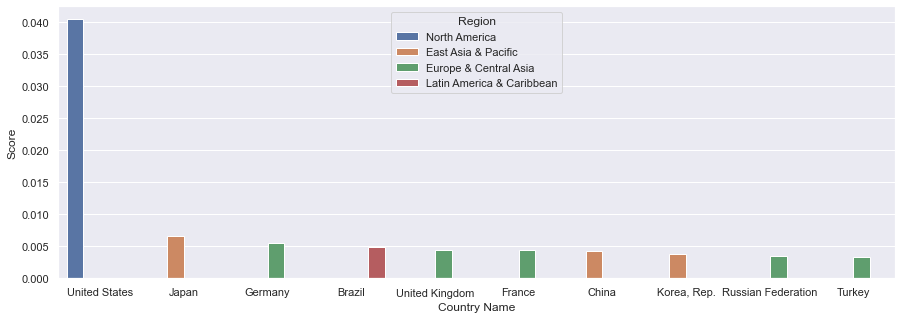

In [237]:
sns.set(rc = {'figure.figsize':(15,5)})
sns.barplot(x=Top10['Country Name'], y=Top10['Score'],hue=Top10['Region'])
plt.show()

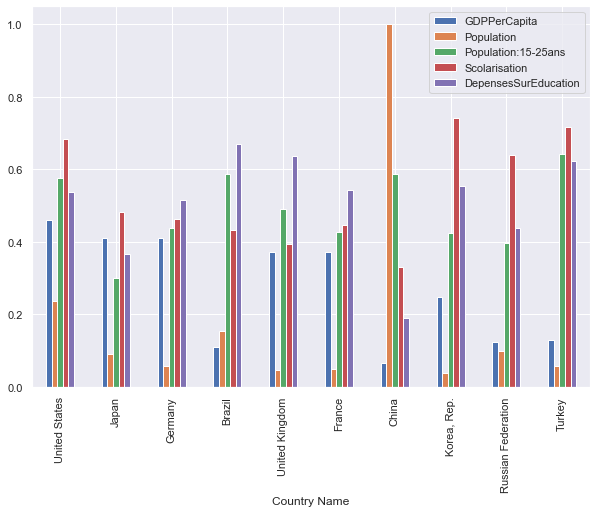

In [238]:
sns.set(rc = {'figure.figsize':(10,7)})

Y=Top10[['Country Name', 'Region', 'GDPPerCapita','Population','Population:15-25ans','Scolarisation', 'DepensesSurEducation']]
Y.plot(x='Country Name',kind='bar');
plt.show()

## Etude des Top 10 pays par indicateur

Internet
count    84.000000
mean      0.694183
std       0.161952
min       0.361218
25%       0.557995
50%       0.697447
75%       0.832926
max       1.000000
Name: Internet, dtype: float64


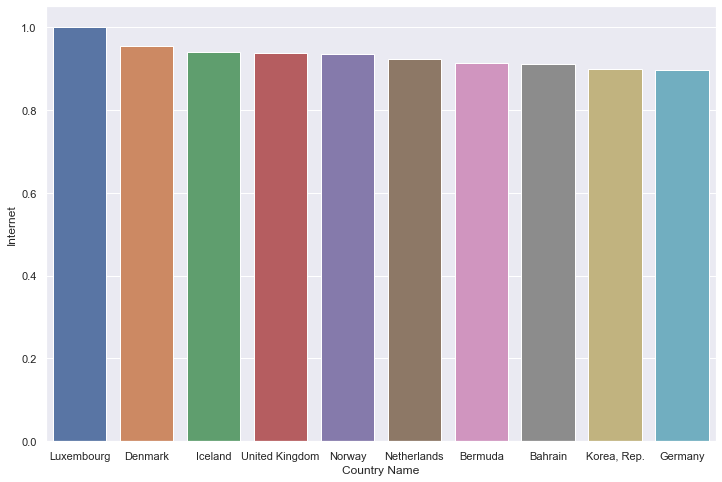

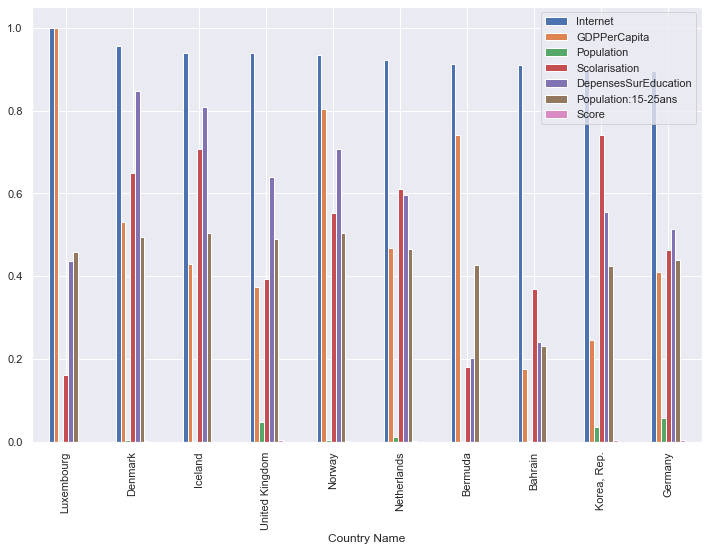

--------------------
GDPPerCapita
count    84.000000
mean      0.235282
std       0.206519
min       0.019865
25%       0.083253
50%       0.148074
75%       0.359540
max       1.000000
Name: GDPPerCapita, dtype: float64


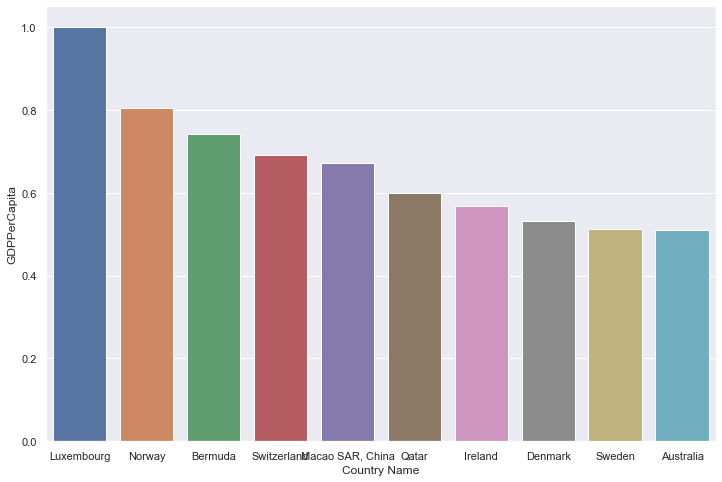

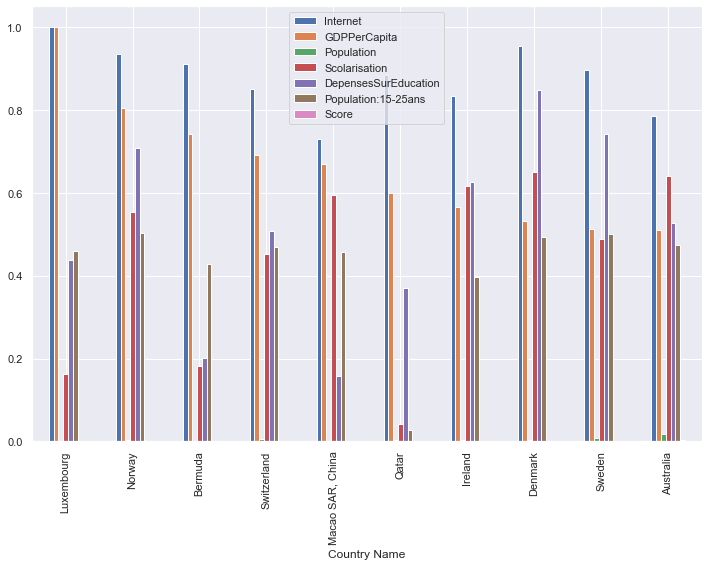

--------------------
Population
count    84.000000
mean      0.032126
std       0.112870
min       0.000041
25%       0.002353
50%       0.006331
75%       0.026113
max       1.000000
Name: Population, dtype: float64


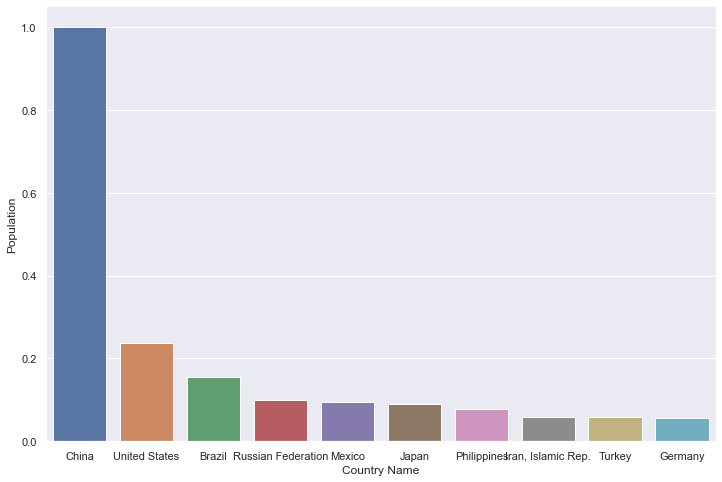

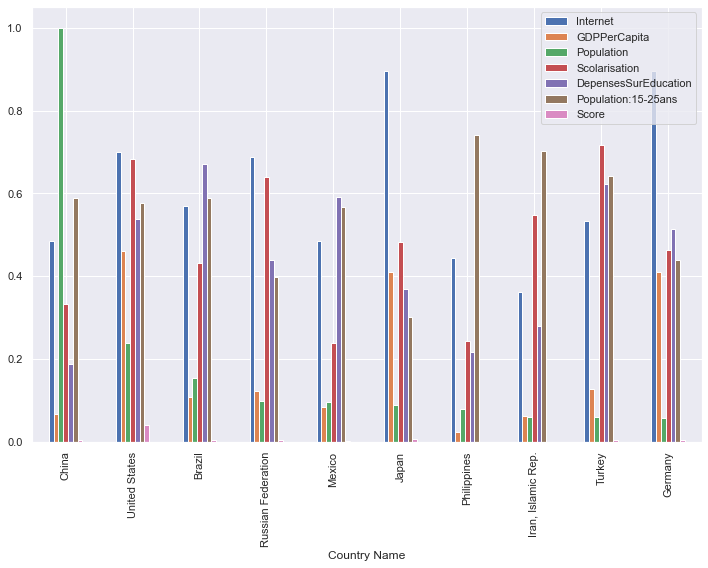

--------------------
Scolarisation
count    84.000000
mean      0.467174
std       0.192941
min       0.041849
25%       0.329837
50%       0.488043
75%       0.602772
max       1.000000
Name: Scolarisation, dtype: float64


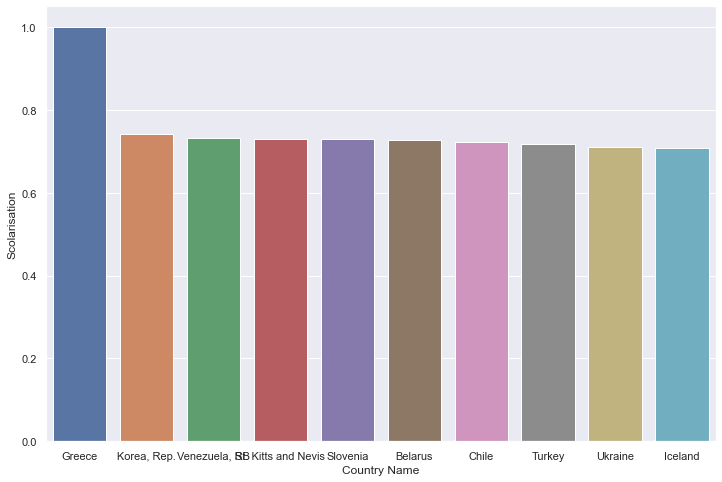

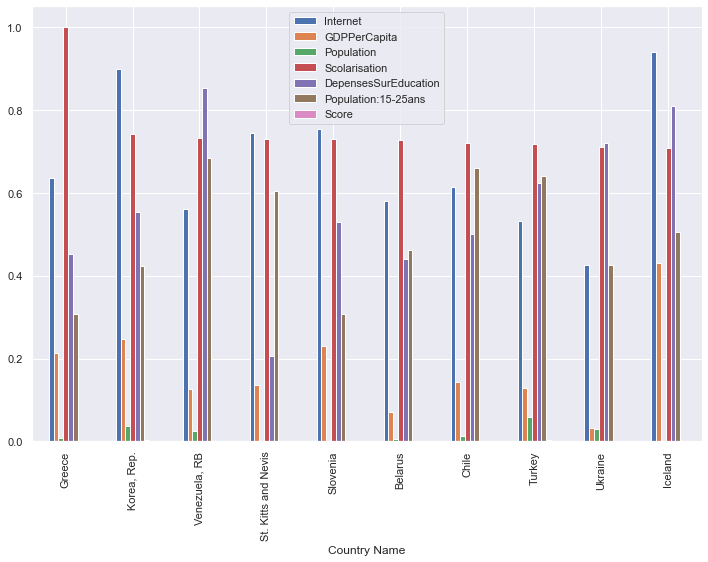

--------------------
DepensesSurEducation
count    84.000000
mean      0.480013
std       0.189228
min       0.128092
25%       0.345569
50%       0.484082
75%       0.596512
max       1.000000
Name: DepensesSurEducation, dtype: float64


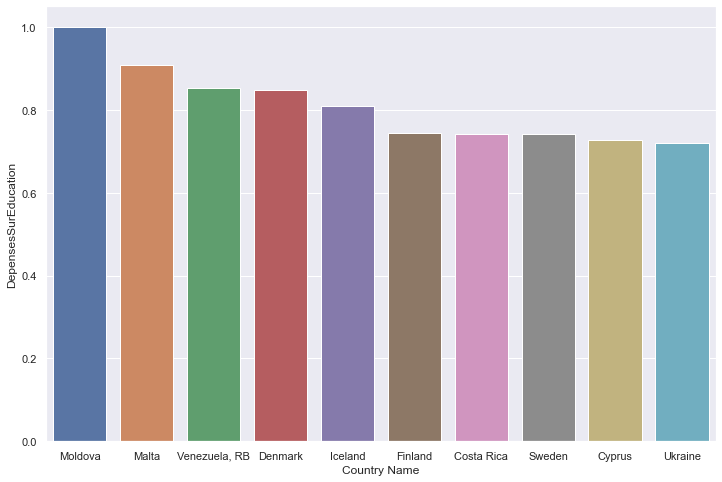

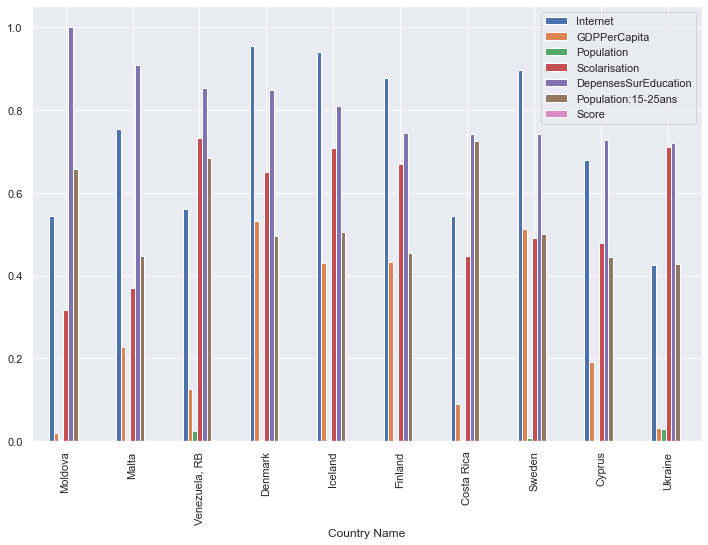

--------------------
Population:15-25ans
count    84.000000
mean      0.523546
std       0.152432
min       0.028067
25%       0.429840
50%       0.502257
75%       0.628235
max       1.000000
Name: Population:15-25ans, dtype: float64


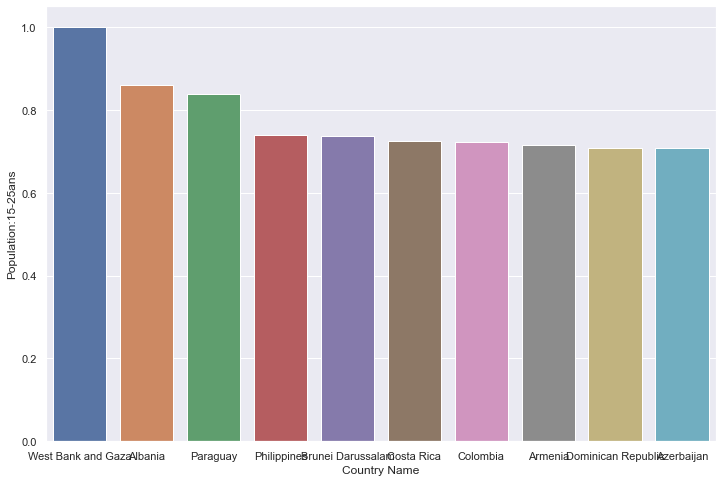

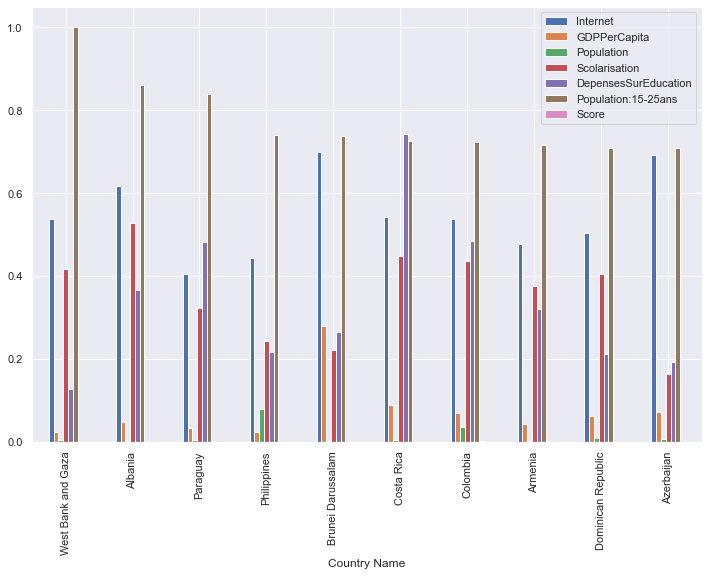

--------------------


In [239]:
sns.set(rc = {'figure.figsize':(12,8)})
for indic in Indic:
    print(indic)
    print(Scores[indic].describe())
    #Scores.boxplot(indic, showfliers=False);
    #plt.show()
    #g = sns.FacetGrid(Scores, row='Region', height=4)
    subset=Scores.sort_values(by=indic, ascending=False).head(10)
    sns.barplot(x=subset['Country Name'], y=subset[indic]);
    subset.plot(x='Country Name',kind='bar');
    #g.figure.subplots_adjust(wspace=.02, hspace=.02)
    #Scores.plot(x='Country Name',y= indic, kind='barh',figsize=(10,10), legend= False);
    plt.show()
    print("-"*20)

## Etude des Top10 Par region

--------------------
North America
count    3.000000
mean     0.014299
std      0.022676
min      0.000001
25%      0.001226
50%      0.002451
75%      0.021448
max      0.040445
Name: Score, dtype: float64


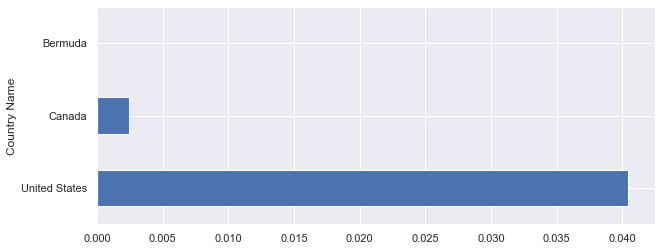

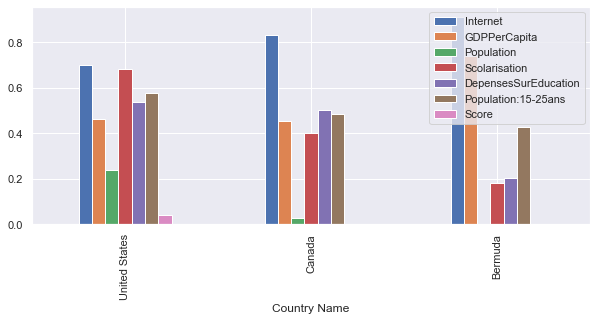

--------------------
--------------------
East Asia & Pacific
count    10.000000
mean      0.001885
std       0.002342
min       0.000005
25%       0.000145
50%       0.000407
75%       0.003595
max       0.006557
Name: Score, dtype: float64


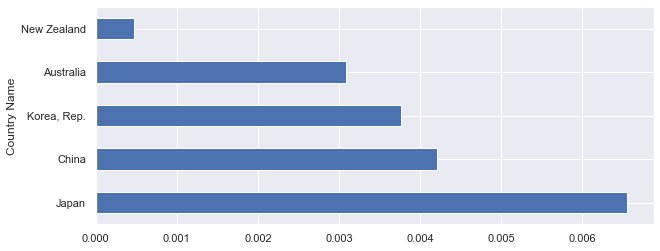

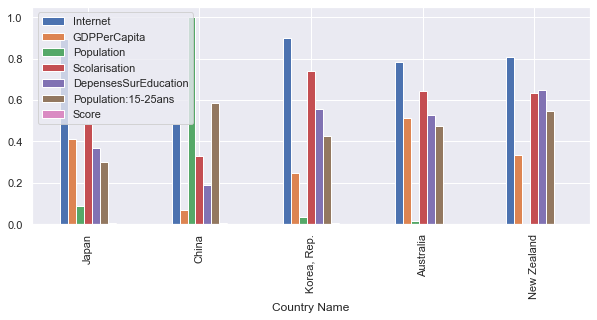

--------------------
--------------------
Europe & Central Asia
count    41.000000
mean      0.001029
std       0.001437
min       0.000005
25%       0.000061
50%       0.000382
75%       0.001199
max       0.005572
Name: Score, dtype: float64


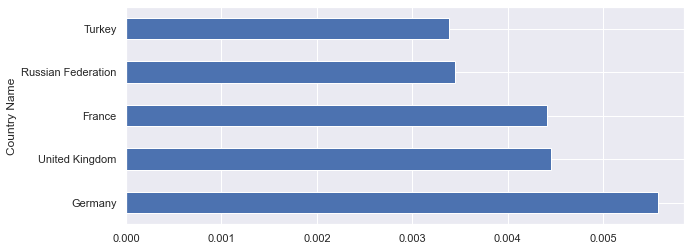

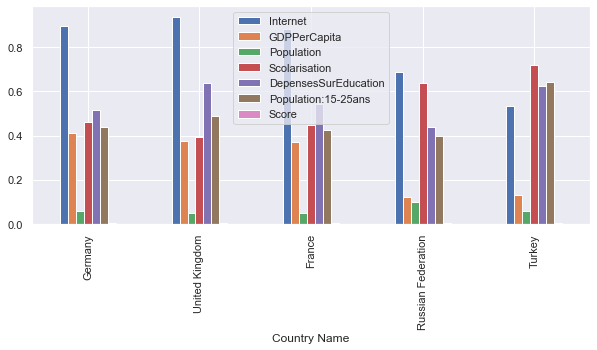

--------------------
--------------------
Latin America & Caribbean
count    1.500000e+01
mean     7.176597e-04
std      1.288932e-03
min      8.344564e-07
25%      2.446797e-05
50%      1.086597e-04
75%      9.123234e-04
max      4.883449e-03
Name: Score, dtype: float64


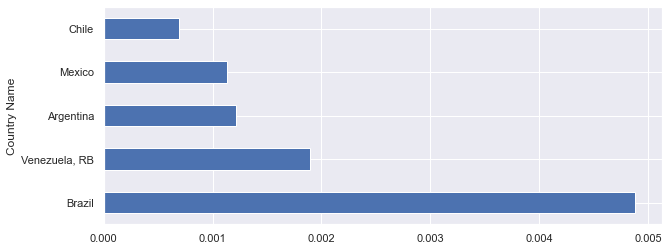

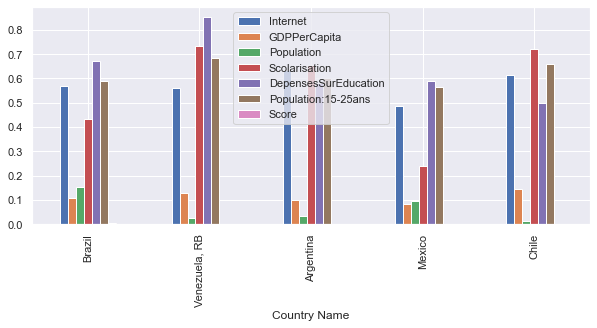

--------------------
--------------------
Middle East & North Africa
count    12.000000
mean      0.000192
std       0.000305
min       0.000004
25%       0.000020
50%       0.000034
75%       0.000190
max       0.000933
Name: Score, dtype: float64


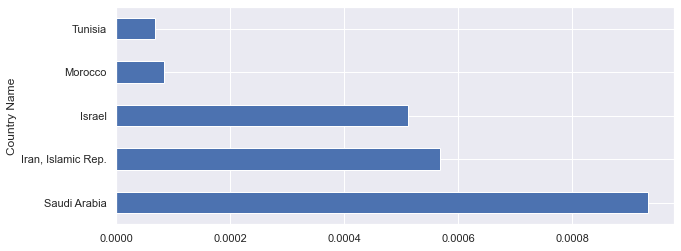

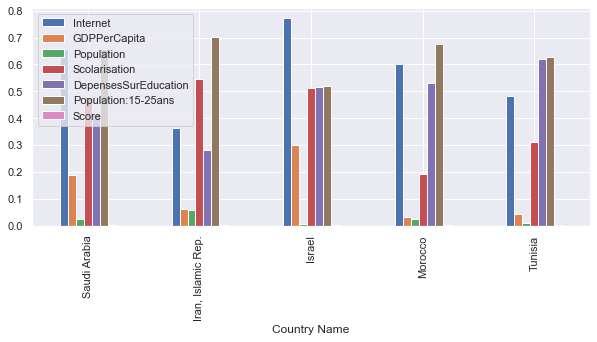

--------------------
--------------------
Sub-Saharan Africa
count    3.000000e+00
mean     8.277529e-05
std      1.325760e-04
min      1.238339e-07
25%      6.316026e-06
50%      1.250822e-05
75%      1.241010e-04
max      2.356938e-04
Name: Score, dtype: float64


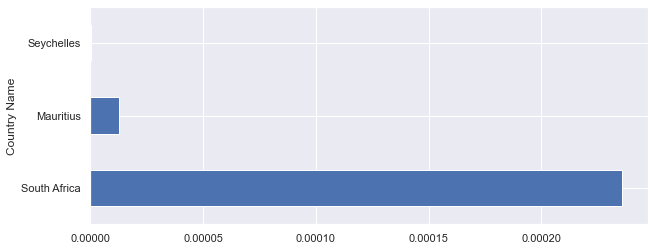

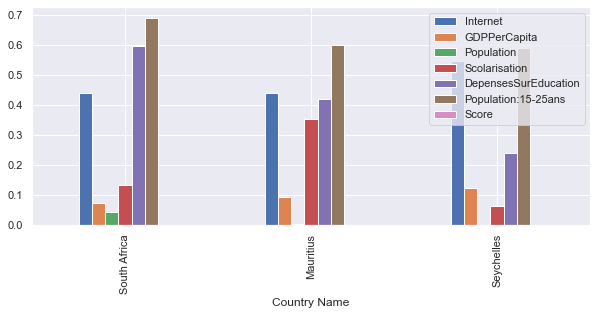

--------------------


In [240]:
sns.set(rc = {'figure.figsize':(10,4)})
ByRegion=Scores.groupby('Region')
for cat in Scores['Region'].unique():
    subset = ByRegion.get_group(cat) # Création du sous-échantillon
    print("-"*20)
    print(cat)
    print(subset['Score'].describe())
    T=subset.sort_values(by='Score', ascending=False).head(5)
    T.plot(x='Country Name',y='Score',kind='barh',legend=False)
    plt.show()
    T.plot(x='Country Name',kind='bar');
    plt.show()
    print("-"*20)
    

# Etude par pays
Je regroupe les informations sur les differents indicateurs dans un meme jeu de donnee et je change le nom de mes indicateurs pour plus de clarte.

In [241]:
ListePays=Top10['Country Name']

In [242]:
df=internet[internet['Country Name'].isin(ListePays)]
df=df.append(GDPPerCapita[GDPPerCapita['Country Name'].isin(ListePays)])
df['Indicator Name']=df['Indicator Name'].fillna('GDPPerCapita')
df=df.append(PopTot[PopTot['Country Name'].isin(ListePays)])
df=df.append(depenses[depenses['Country Name'].isin(ListePays)])
df=df.append(scolarisation[scolarisation['Country Name'].isin(ListePays)])
df=df.append(PctPop1524[PctPop1524['Country Name'].isin(ListePays)])
df['Indicator Name']=df['Indicator Name'].fillna('Population:15-25ans')
df=df.drop(['Country Code','Income Group','Region','Indicator Code','Topic'],axis=1)
df.reset_index(inplace=True)
#df.insert(0,'Indicateur',['Internet', 'GDPPerCapita','Population','DepensesSurEducation','Inscriptions'])
df=df.drop('index', axis=1)
df.head()  


,Country Name,Indicator Name,1997,1998,1999,2000,2001,2002,2003,2004,...,2010,2011,2012,2013,2014,2015,2016,2021,2026,2031
0,Brazil,Internet users (per 100 people),0.786079,1.477875,2.038732,2.870685,4.528495,9.149425,13.207586,19.073672,...,40.65,45.690000,48.560000,51.040000,54.551002,58.327952,59.682747,78.896001,96.364184,113.832368
1,China,Internet users (per 100 people),0.032395,0.168540,0.708188,1.775913,2.639650,4.595704,6.200000,7.300000,...,34.30,38.300000,42.300117,45.800000,47.900000,50.300000,53.200000,67.270261,83.189887,99.109513
2,France,Internet users (per 100 people),4.255004,6.319779,9.125318,14.307924,26.325904,30.180000,36.140000,39.150000,...,77.28,77.819999,81.440000,81.919800,83.750000,84.694500,85.622200,122.298289,146.600796,170.903302
3,Germany,Internet users (per 100 people),6.711087,9.877852,20.845983,30.216347,31.650939,48.820000,55.900000,64.730000,...,82.00,81.270000,82.349998,84.170000,86.190000,87.589800,89.647101,124.035684,145.513521,166.991359
4,Japan,Internet users (per 100 people),9.163077,13.414041,21.391290,29.990740,38.532061,46.594201,48.435266,62.393930,...,78.21,79.054114,79.496400,88.219429,89.106833,91.058028,92.000000,123.953405,145.482756,167.012107


In [243]:
df=df.replace(['Internet users (per 100 people)'],'Internet')
df=df.replace(['Population, total'],'Population')
df=df.replace(['Government expenditure on education as % of GDP (%)'],'DepensesSurEducation')
df=df.replace(['Gross enrolment ratio, tertiary, both sexes (%)'],'Scolarisation')

In [244]:
df['Indicator Name'].unique()

array(['Internet', 'GDPPerCapita', 'Population', 'DepensesSurEducation',
       'Scolarisation', 'Population:15-25ans'], dtype=object)

In [245]:
Growthdf=df[['Country Name','Indicator Name']]
Growthdf=calculateGrowth(df, Growthdf)
Growthdf=Growthdf.drop(['1997-2001','2002-2006'],axis=1)
Growthdf.head()

C:\Users\marwa\AppData\Local\Temp/ipykernel_10628/2571176275.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Growth['1997-2001']=(datafr['2001']-datafr['1997'])/datafr['1997']
C:\Users\marwa\AppData\Local\Temp/ipykernel_10628/2571176275.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Growth['2002-2006']=(datafr['2006']-datafr['2002'])/datafr['2002']
C:\Users\marwa\AppData\Local\Temp/ipykernel_10628/2571176275.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

,Country Name,Indicator Name,2007-2011,2012-2016,2016-2021,2021-2026,2026-2031
0,Brazil,Internet,0.479598,0.229052,0.321923,0.221408,0.181273
1,China,Internet,1.393750,0.257680,0.264479,0.236652,0.191365
2,France,Internet,0.177485,0.051353,0.428348,0.198715,0.165773
3,Germany,Internet,0.081293,0.088611,0.383600,0.173159,0.147600
4,Japan,Internet,0.063985,0.157285,0.347320,0.173689,0.147986


# Etude par Pays
On peut recuperer les infos et graphiques de chaque pays des Top10

In [246]:
ParPaysGrowth=Growthdf.groupby('Country Name')
ParPays=df.groupby('Country Name')
def infoPays(pays): 
    print('-------------------------')
    print(pays)
    subset=ParPaysGrowth.get_group(pays)
    subset.index=subset['Indicator Name']
    subset=subset.drop(['Country Name','Indicator Name'],axis=1)
    T=subset.transpose()
    years=T.index
    years=years.tolist()
    T.insert(0,'Years', years)
    #sns.set(rc = {'figure.figsize':(12,4)})
    #ax = plt.gca()
    #T.plot(kind='line', x='Years', y='Internet',ax=ax)
    print('----------Croissance par tranche de 5ans---------------')
    T.plot(kind='bar',figsize=(10,6))
    #T.plot(kind='line', x='Years', y='Population',,ax=ax)
    #T.plot(kind='line', x='Years', y='DepensesSurEducation',ax=ax)
    #T.plot(kind='line', x='Years', y='Scolarisation',ax=ax)
    plt.show();
    #T.plot(kind='bar',subplots=True, layout=(3,3),figsize=(15, 15),sharex=False);
    #plt.show()
    subsetPays=ParPays.get_group(pays)
    subsetPays.index=subsetPays['Indicator Name']
    subsetPays=subsetPays.drop(['Country Name','Indicator Name'],axis=1)
    P=subsetPays.transpose()
    years=P.index
    years=years.tolist()
    P.insert(0,'Years', years)
    print('--------Evolution par indicateur-----------------')
    #T.plot.scatter(x='GDPPerCapita',y='Internet users (per 100 people)')
    P.plot(subplots=True, layout=(3,3),figsize=(10, 10),sharex=False);
    plt.show()
    print('---------Regression-------------')
    P['Years']=P['Years'].astype(float)
    #sns.set(rc = {'figure.figsize':(1,1)})
    plt.show()  
    sns.lmplot(x="GDPPerCapita", y='Internet',data=P)
    plt.show()
    sns.lmplot(x="GDPPerCapita", y='Population:15-25ans',data=P)
    plt.show()
    sns.lmplot(x="Scolarisation", y='Population:15-25ans',data=P)
    plt.show()
    sns.lmplot(x="Scolarisation", y='GDPPerCapita',data=P)
    plt.show()
       
    

-------------------------
United Kingdom
----------Croissance par tranche de 5ans---------------


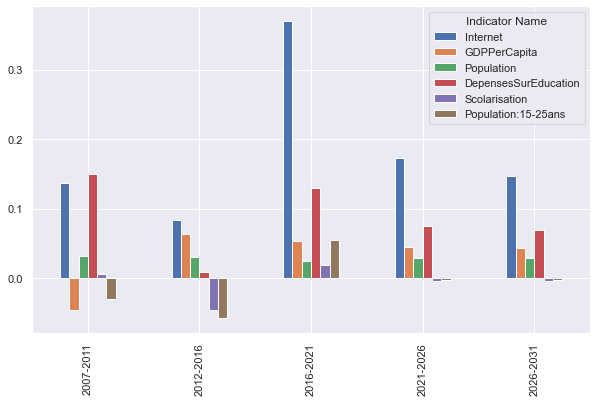

--------Evolution par indicateur-----------------


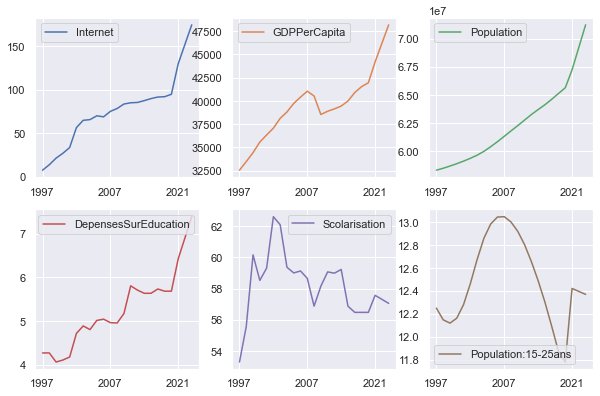

---------Regression-------------


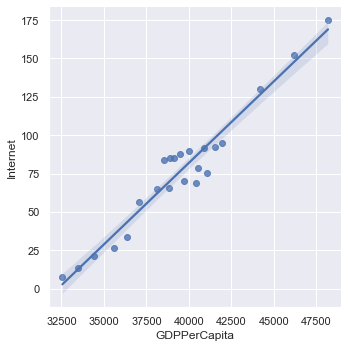

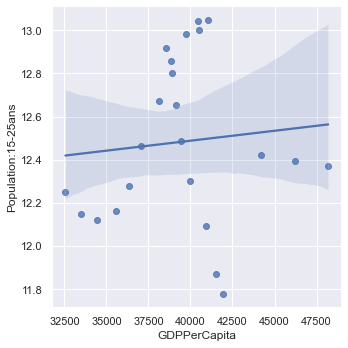

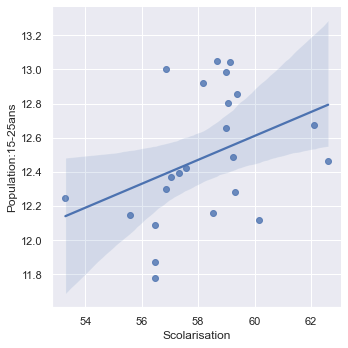

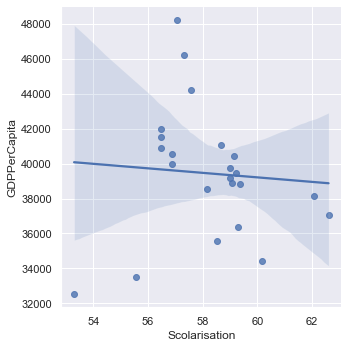

In [247]:
infoPays('United Kingdom')